<div class="alert alert-block alert-info">   

# Alcohol Consumption Prediction Project  
#### Final project for BABS 508 - Advanced Predictive Business Analytics  
    
By Zhihao Hu (Logistic regression) & Thien Nguyen (Poisson regression)

</div>

---

## Table of Contents
[Project description](#Description)  
[Introduction](#Introduction)  

[Data preparation for Logistic Regression](#Data_prep1)  
[Predictions and Exploratory Data Analysis for Logistic Regression](#EDA1)  
[Logistic regression model](#Logistic)  

[Data preparation for Poisson Regression](#Data_prep2)  
[Predictions and Exploratory Data Analysis for Poisson Regression](#EDA2)  
[Poisson regression model](#Poisson)  
[Discussion](#Discussion)


[Appendix A: Building the Logistic Rgression Model](#AppendixA)  
[Appendix B: Building the Poisson Rgression Model](#AppendixB)

---

<div class="alert alert-block alert-info">   
<a id="Description"></a>

# Project description

This project applies logistic and Poisson regression  to understand factors that relate to alcohol consumption.   
<br>
    
The datased is from the Behavioural Risk Factor Surveillance System (BRFSS) Survey from 2013. The data was collected from adults (18 years +) living in the United States. The data was collected via telephone survey, using disproportionate stratified sampling (to yield better estimates than simple random sampling) for the landline sample, and using randomly selected respondents for the cellular phone sample. (https://www.cdc.gov/brfss/).      
<br>

The purpose of the survey is to collect data about health-related risk behaviours (food, sleep, alcohol, smoking), medical/health conditions, and the use of medical services.   
<br>    
 
All data collected is observational, so we will not be able to determine causal relationships. However, a better understanding of the associations can help identify potential risk factors or variables to target for intervention.   
    </div>

### Response variables   

The dataset includes two variables of interest about alcohol consumption:
- `alcday5` (count), which includes responses to the question: During the past 30 days, how many days per week or per month did you have at least one drink of any alcoholic beverage such as beer, wine, a malt beverage or liquor? 
- `drnk3ge5` (count), which includes responses to the question: Considering all types of alcoholic beverages, how many times during the past 30 days did you have 5 or more drinks for men or 4 or more drinks for women on an occasion?

### Potential explanatory variables  
  
   
1. `physhlth` (quantitative); Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? 
2. `menthlth` (quantitative); Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? 
3. `poorhlth` (quantitative); During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation?
3. `sleptim1` (quantitative); On average, how many hours of sleep do you get in a 24-hour period? 
4. `marital` (categorical); Are you: married, divorced, widowed, separated, never married, a member of an unmarried couple?
5. `educa` (categorical); What is the highest grade or year of school you completed? 
    - Never attended school or only kindergarten
    - Grades 1 through 8 (Elementary)
    - Grades 9 through 11 (Some high school)
    - Grade 12 or GED (High school graduate)
    - College 1 year to 3 years (Some college or technical school)
    - College 4 years or more (College graduate)
6. `income2` (categorical); Is your annual household income from all sources (choose from below)
    - Less than \\$10,000
    - Less than \\$15,000 (between \\$10,000 and \\$15,000)
    - Less than \\$20,000 (between \\$15,000 and \\$20,000)
    - Less than \\$25,000 (between \\$20,000 and \\$25,000)
    - Less than \\$35,000 (between \\$25,000 and \\$35,000)
    - Less than \\$50,000 (between \\$35,000 and \\$50,000)
    - Less than \\$75,000 (between \\$50,000 and \\$75,000)
    - $75,000 or more  
7. `sex` (categorical); Indicate sex of respondent. Note that this is defined as binary categorical and the original survey used the term "sex" rather than "gender". 

<div class="alert alert-block alert-info">   

### Methods  
    
The first part of the project will conduct exploratory data analysis, visualizing the relationships between the variables.     
<br>
In the main part of the project, a logistic regression model and a Poisson regression model will be created and interpreted for their results.    
<br>
At the end of the project, there will be code for any other candidate models considered.    
<br>
The strengths and limitations of your models will be discussed along with any recommendations to address the limitations.
<div>


<div class="alert alert-block alert-success">
<a id="Introduction"></a>  

# Introduction 
</div>

Alcohol consumption is a significant public health concern that can lead to adverse consequences, such as liver disease, cancer, and social problems. To better understand the relationship between alcohol consumption and our potential explanatory variables, we conducted an analysis using logistic and Poisson regression models. Although the casual relationship cannot be inferred, we can have a better understanding of the associations can help identify potential risk factors or variables to target for intervention.

The data used in this project was collected from the Behavioral Risk Factor Surveillance System (BRFSS) Survey from 2013 using disproportionate stratified sampling. The purpose of the survey is to collects data on health-related risk behaviors, medical/health conditions and the use of medical services of adults (18 years +) living in the United States.

By exploring potential explanatory variables, such as physical and mental health, sleep, marital status, education, income, and sex, we hope to gain insights into the factors that contribute to alcohol consumption. By using binary dependent variables in Logistic regression and count dependent variables in Poisson regression, we hope to cultivate the relationship between potential explanatory variables and dependent variables.

The insights gained from this analysis could inform public health policies and interventions to reduce alcohol consumption and its related harms. Specifically, we could address alcohol-related harms by focusing on controlling the independent variables which contribute more to the alcohol consumption and to make particular policies and regulations to reduce alcohol consumption.
 

---
### Import the data

In [1]:
library(MASS)
library(car)
library(zoo)
library(ggplot2)
library(dplyr)
library(forcats)

Loading required package: carData


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Import the data:
load(file= "brfss2013.RData")

In [3]:
 # Here is a version of the data including only the columns of interest:
mydata <- brfss2013[,c(20, 21, 22, 27, 46, 48, 50, 59, 73, 75)]
head(mydata)

physhlth menthlth poorhlth sleptim1 marital 
1 30       29       30       NA       Divorced
2  0        0       NA        6       Married 
3  3        2        0        9       Married 
4  2        0        0        8       Married 
5 10        2        0        6       Married 
6  0        0       NA        8       Divorced
  educa                                                       
1 College 4 years or more (College graduate)                  
2 College 1 year to 3 years (Some college or technical school)
3 College 4 years or more (College graduate)                  
4 Grade 12 or GED (High school graduate)                      
5 College 4 years or more (College graduate)                  
6 College 4 years or more (College graduate)                  
  income2           sex    alcday5 drnk3ge5
1 Less than $75,000 Female 201      0      
2 $75,000 or more   Female   0     NA      
3 $75,000 or more   Female 220     20      
4 Less than $75,000 Female 208      0      
5 Less than $50,000 Male   210      0      
6 $75,000 or more   Female   0     NA

<div class="alert alert-block alert-warning">
<a id="Data_prep1"></a>

# Data preparation for Logistic Regression 
</div>

In [4]:
# Remove NAs and values 1 and 2 from alcday5
mydata <- mydata[!(is.na(mydata$alcday5) | mydata$alcday5 %in% c(1, 2)), ]

# Replace NAs in drnk3ge5 with 0 and exclude values >30
mydata$drnk3ge5[is.na(mydata$drnk3ge5)] <- 0
mydata <- mydata[mydata$drnk3ge5 <= 30,]
# Exclude values >30 and NAs from physhlth
mydata <- mydata[!(is.na(mydata$physhlth) | mydata$physhlth > 30), ]

# Exclude values >30 and NAs from menthlth
mydata <- mydata[!(is.na(mydata$menthlth) | mydata$menthlth > 30), ]

# Exclude values >30 and NAs from poorhlth
mydata <- mydata[!(is.na(mydata$poorhlth) | mydata$poorhlth > 30), ]

# Exclude values >24 and NAs from sleptim1
mydata <- mydata[!(is.na(mydata$sleptim1) | mydata$sleptim1 > 24), ]

# Exclude NAs from marital
mydata <- mydata[!is.na(mydata$marital), ]

# Exclude NAs from educa
mydata <- mydata[!is.na(mydata$educa), ]

# Exclude NAs from income2
mydata <- mydata[!is.na(mydata$income2), ]

# Exclude NAs from sex
mydata <- mydata[!is.na(mydata$sex), ]


In [5]:
str(mydata)

'data.frame':	196673 obs. of  10 variables:
 $ physhlth: int  3 2 10 5 0 30 0 3 0 3 ...
 $ menthlth: int  2 0 2 0 1 0 30 3 3 2 ...
 $ poorhlth: int  0 0 0 10 0 5 4 0 0 0 ...
 $ sleptim1: int  9 8 6 6 6 3 7 6 7 6 ...
 $ marital : Factor w/ 6 levels "Married","Divorced",..: 1 1 1 3 1 1 2 1 1 1 ...
 $ educa   : Factor w/ 6 levels "Never attended school or only kindergarten",..: 6 4 6 5 6 6 4 4 6 5 ...
 $ income2 : Factor w/ 8 levels "Less than $10,000",..: 8 7 6 6 8 1 3 8 6 7 ...
 $ sex     : Factor w/ 2 levels "Male","Female": 2 2 1 2 1 1 2 2 2 1 ...
 $ alcday5 : int  220 208 210 202 205 0 0 201 0 230 ...
 $ drnk3ge5: num  20 0 0 0 0 0 0 0 0 0 ...


In [6]:
mydata

physhlth menthlth poorhlth sleptim1 marital                        
3       3        2        0        9       Married                        
4       2        0        0        8       Married                        
5      10        2        0        6       Married                        
8       5        0       10        6       Widowed                        
11      0        1        0        6       Married                        
12     30        0        5        3       Married                        
17      0       30        4        7       Divorced                       
19      3        3        0        6       Married                        
21      0        3        0        7       Married                        
27      3        2        0        6       Married                        
28     30        2        0       10       Married                        
31     14        0       14        5       Married                        
35     10        0        0        8       Married                        
38      1        0        3        6       Married                        
43     30        0       30        4       Divorced                       
47      4        0        0        7       Married                        
55      0        5        0        8       Married                        
56     23       30       30        4       Divorced                       
57      0        8        0        8       Separated                      
58      0        5        0        6       Married                        
63     14        7        0        6       Separated                      
65      2        0        2        7       Never married                  
67      1        2        0        7       Divorced                       
68      4       10        2        6       Never married                  
69     15       10        5        9       Married                        
71      3        1        0        8       Divorced                       
73     30        0        0        6       Married                        
75     30        2       15       10       A member of an unmarried couple
77      2       30        0        6       Divorced                       
80      0       30        0        7       Divorced                       
⋮      ⋮        ⋮        ⋮        ⋮        ⋮                              
491693  0       30        0        4       Never married                  
491696  0       30        0        6       Separated                      
491697  0       30       30       10       Married                        
491698  7       14        7        4       Never married                  
491701  0        2        0        6       A member of an unmarried couple
491702  1       30        1        8       Married                        
491704  0       30       15       10       A member of an unmarried couple
491705  3        2        0        6       Married                        
491708  5       30        7        6       Married                        
491709  0       10        0        8       Never married                  
491711  3       30        0        6       Divorced                       
491712 30       30       30        5       Separated                      
491717  3        0        3        7       Never married                  
491719 14        0        2        6       Married                        
491720 30        0       30        6       Divorced                       
491721 10       14        7        8       Married                        
491723 15        7        0        9       Married                        
491725 30        0        2        5       Married                        
491735  5        0        0        8       Married                        
491741  7        0        0        5       Divorced                       
491745  6        0        6        5       Never married                  
491750  7        0        0     

In [7]:
#Transform dependant variable to binary format
mydata$alcday5_new <- ifelse(mydata$alcday5 == 0, 0, 1)

In [8]:
cat('The proportion of individuals who have consumed at least 1 alcoholic drink in the last 30 days  is ', mean(mydata$alcday5_new))

The proportion of individuals who have consumed at least 1 alcoholic drink in the last 30 days  is  0.507487

What is the proportion of individuals who have consumed at least 1 alcoholic drink in the last 30 days? (0.25 marks)

The proportion of individuals who have consumed at least 1 alcoholic drink in the last 30 days is 0.51.

<div class="alert alert-block alert-warning">
<a id="EDA1"></a>

# Predictions and Exploratory Data Analysis for Logistic Regression 
</div>

### 1. Physical health

Poor physical health and the response variable is expected to be negatively related and almost linear.

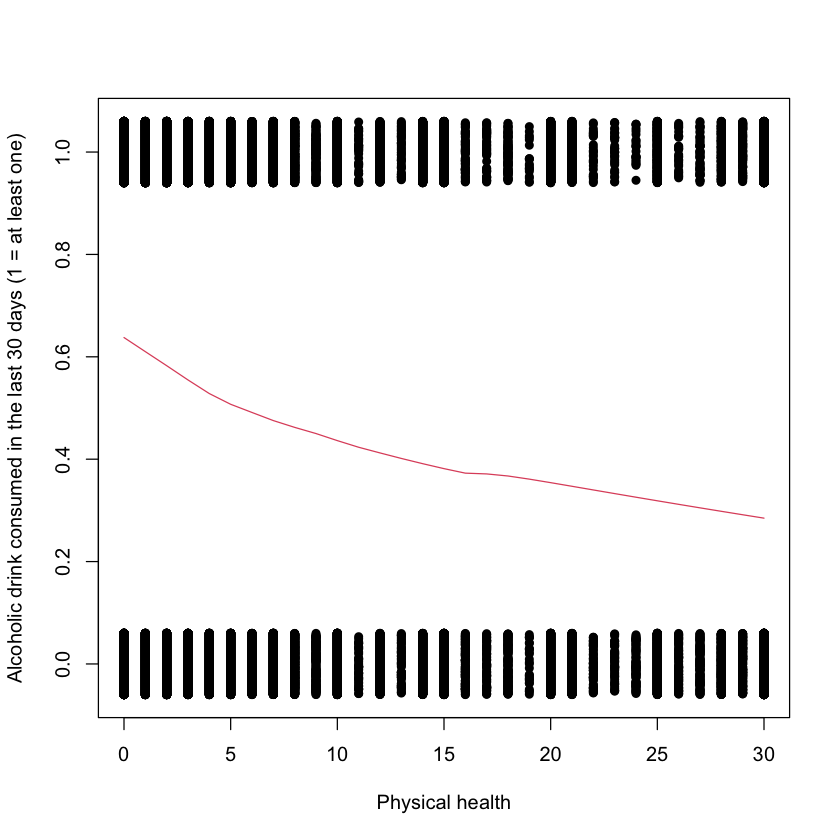

In [9]:
plot(jitter(alcday5_new,f=0.3) ~ physhlth, data=mydata, ylab="Alcoholic drink consumed in the last 30 days (1 = at least one)", xlab="Physical health", pch=16)
lines(lowess(mydata$physhlth,jitter(mydata$alcday5_new,f=0.3), ),col=2)

### 2. Mental health

Poor mental health and the response variable is expected to be mostly positively related

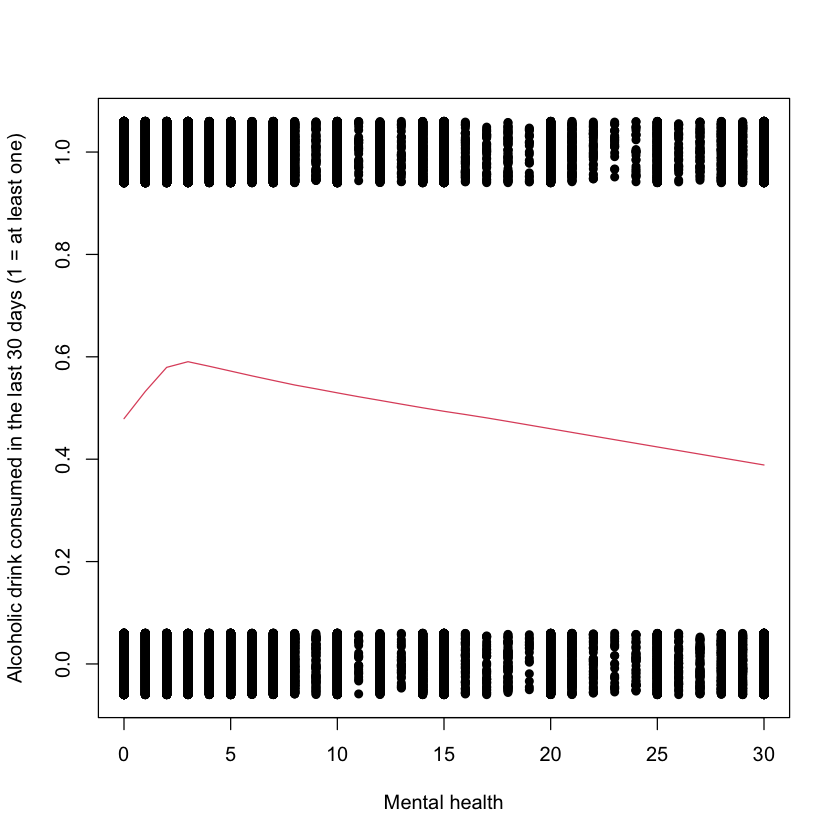

In [10]:
plot(jitter(alcday5_new,f=0.3) ~ menthlth, data=mydata,ylab="Alcoholic drink consumed in the last 30 days (1 = at least one)", xlab="Mental health", pch=16)
lines(lowess(mydata$menthlth,jitter(mydata$alcday5_new,f=0.3)),col=2)

### 3. Poor health

Poor health and the response variable is expected to be firstpositively related and but later negative after poor health passes a certain point

My prediction for the relationship between the poor health and the response variable would be first positively related and after poorhlth is greater than 3, there is a negative linear relationship between poor health and the response varaible.

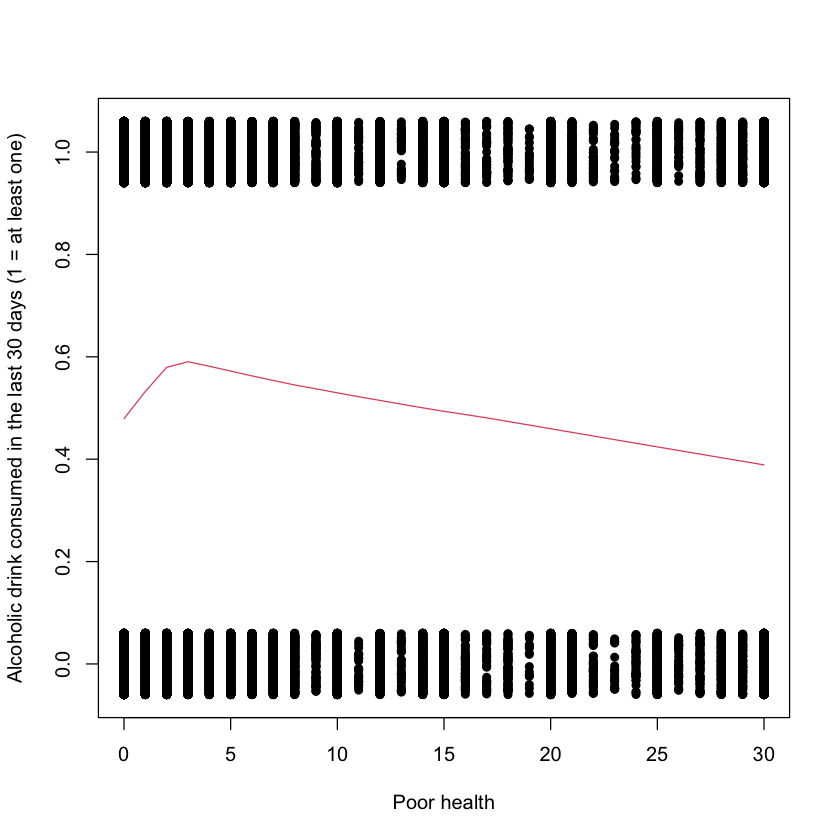

In [11]:
plot(jitter(alcday5_new,f=0.3) ~ menthlth, data=mydata,ylab="Alcoholic drink consumed in the last 30 days (1 = at least one)", xlab="Poor health", pch=16)
lines(lowess(mydata$menthlth,jitter(mydata$alcday5_new,f=0.3)),col=2)

### 4. Average amount of sleep

The amount of sleep and the response variable is expected to be first negatively related and after sleptim1 is greater than a certain point, there is a positive relationship.

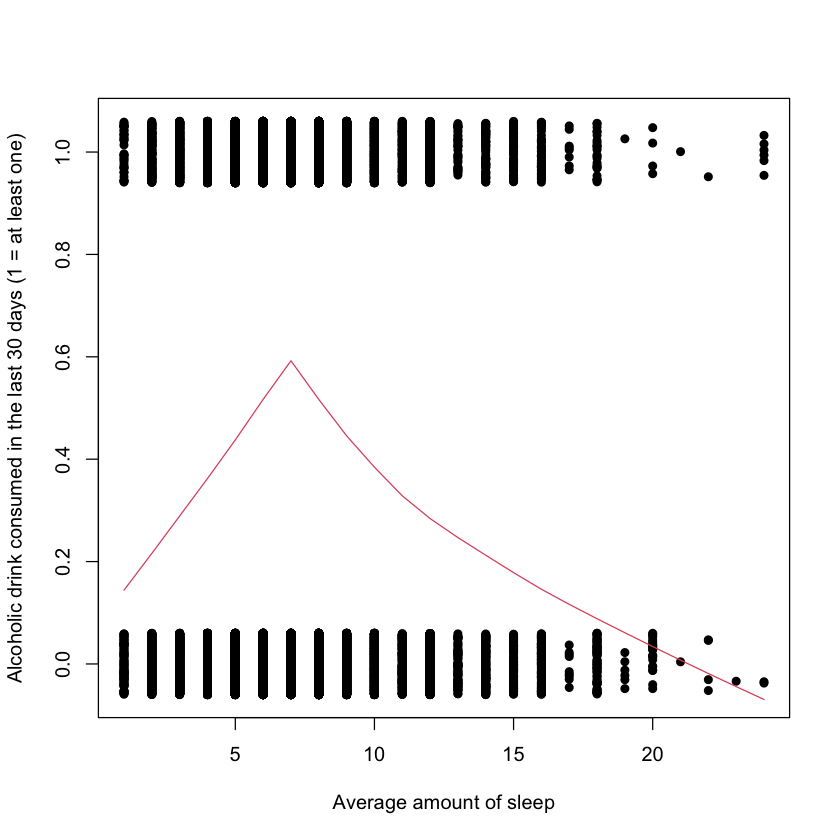

In [12]:
plot(jitter(alcday5_new,f=0.3) ~ sleptim1, data=mydata, ylab="Alcoholic drink consumed in the last 30 days (1 = at least one)", xlab="Average amount of sleep",pch=16)
lines(lowess(mydata$sleptim1,jitter(mydata$alcday5_new,f=0.3)),col=2)

### 5. Marital status

Marital status and the response variable is expected to have significant relationship. Maybe the ones without partners will be more likely to consume more alcohol.


The proportion of individuals who have consumed at least 1 alcoholic drink in the last 30 days for different marital status are as follows:

In [129]:
table1 <- prop.table(table(mydata$alcday5_new, mydata$marital), margin = 2)[2,]
data.frame(table1)

table1   
Married                         0.5372288
Divorced                        0.4690604
Widowed                         0.3379322
Separated                       0.4505887
Never married                   0.5599670
A member of an unmarried couple 0.6415035



It could be a good explanatory variable to use according to the result of chi-squared test which indicating that there is significant difference between different marital levels. Therefore, we could distinguish our data by using marital status.

In [130]:
chisqTest1 <- chisq.test(table(mydata$alcday5_new, mydata$marital))
print(chisqTest1)


	Pearson's Chi-squared test

data:  table(mydata$alcday5_new, mydata$marital)
X-squared = 4060.3, df = 5, p-value < 2.2e-16



### 6. Education

Education status and the response variable is expected to NOT have significant relationship. Maybe the one without spouse will be more likely to consume more alcohol.

The proportion of individuals who have consumed at least 1 alcoholic drink in the last 30 days for different education are as follows:



In [132]:
table2 <- prop.table(table(mydata$alcday5_new, mydata$educa), margin = 2)[2,];
data.frame(table2)

table2   
Never attended school or only kindergarten                   0.2527473
Grades 1 through 8 (Elementary)                              0.2296925
Grades 9 though 11 (Some high school)                        0.3067627
Grade 12 or GED (High school graduate)                       0.4131674
College 1 year to 3 years (Some college or technical school) 0.5065827
College 4 years or more (College graduate)                   0.6376271



It could be a good explanatory variable to use according to the result of chi-squared test which indicating that there is significant difference between different education levels. Therefore, we could distinguish our data by using education.m

In [136]:

chisqTest2 <- chisq.test(table(mydata$alcday5_new, mydata$educa))
print(chisqTest2)


	Pearson's Chi-squared test

data:  table(mydata$alcday5_new, mydata$educa)
X-squared = 9957.6, df = 5, p-value < 2.2e-16



### 7. Income

Income status and the response variable is expected to have significant relationship. Maybe the one wih higher income will be more likely to consume more alcohol.


The proportion of individuals who have consumed at least 1 alcoholic drink in the last 30 days for different marital status are as follows:



In [134]:
table3 <- prop.table(table(mydata$alcday5_new, mydata$income2), margin = 2)[2,];
data.frame(table3)

table3   
Less than $10,000 0.3191489
Less than $15,000 0.3081613
Less than $20,000 0.3552960
Less than $25,000 0.4047619
Less than $35,000 0.4543697
Less than $50,000 0.5238506
Less than $75,000 0.5887343
$75,000 or more   0.7013198

It could be a good explanatory variable to use according to the result of chi-squared test which indicating that there is significant difference between different income levels. Therefore, we could distinguish our data by using income.

In [135]:
chisqTest3 <- chisq.test(table(mydata$alcday5_new, mydata$income2))
print(chisqTest3)


	Pearson's Chi-squared test

data:  table(mydata$alcday5_new, mydata$income2)
X-squared = 15321, df = 7, p-value < 2.2e-16



### 8. Sex/gender

Gender and the response variable is expected to not have significant relationship

The proportion of individuals who have consumed at least 1 alcoholic drink in the last 30 days for different marital status are as follows:

In [137]:
table4 <- prop.table(table(mydata$alcday5_new, mydata$sex), margin = 2)[2,]
data.frame(table4)

table4   
Male   0.5838062
Female 0.4612602


It could be a good explanatory variable to use according to the result of chi-squared test which indicating that there is significant difference between different sex. Therefore, we could distinguish our data by using sex.

In [139]:
chisqTest4 <- chisq.test(table(mydata$alcday5_new, mydata$sex))
print(chisqTest4)


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(mydata$alcday5_new, mydata$sex)
X-squared = 2775.6, df = 1, p-value < 2.2e-16



<div class="alert alert-block alert-success">
<a id="Logistic"></a>

# Logistic Regression Model

    
</div>    

### Fit final model 

In [17]:
# Fit your final model here.
# Use summary to get model co-efficients and other useful output.
final_model <- glm(alcday5_new ~ physhlth + marital * income2 + sex, data = mydata, family = "binomial"(link="logit"))
summary(final_model)


Call:
glm(formula = alcday5_new ~ physhlth + marital * income2 + sex, 
    family = binomial(link = "logit"), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0217  -1.0709   0.6548   1.0313   2.0959  

Coefficients:
                                                                 Estimate
(Intercept)                                                     -0.359662
physhlth                                                        -0.030152
maritalDivorced                                                  0.275525
maritalWidowed                                                  -0.370388
maritalSeparated                                                 0.233841
maritalNever married                                             0.550655
maritalA member of an unmarried couple                           0.687863
income2Less than $15,000                                        -0.090865
income2Less than $20,000                                         0.069009
incom

The link function is logit.

For categorical variable marital, married has been set as reference value. For categorical variable income2, Less than $10,000
has been set as reference value. For categorical variable sex, Male has been set as reference value.

### Plots to visualize the model fit. 

### Plot of sex

In [140]:
#Need to create new data for each color
physhlth <- seq(min(mydata$physhlth), max(mydata$physhlth), length.out = 4800)

xnew.df <- as.data.frame(physhlth)



xnew.df.6 <- rbind(xnew.df, xnew.df, xnew.df, xnew.df,xnew.df,xnew.df)
xnew.df.2 <- rbind(xnew.df, xnew.df)

sex <- c(rep("Male", 4800), rep("Female", 4800))
marital <- c(rep("Married", 1600), rep("Widowed", 1600),rep("Divorced", 1600),rep("Separated", 1600),rep("Never married", 1600),rep("A member of an unmarried couple",1600))
income2 <- c(rep("$75,000 or more", 1200), rep("Less than $75,000", 1200),rep("Less than $50,000", 1200),rep("Less than $10,000", 1200),rep("Less than $25,000", 1200),rep("Less than $20,000", 1200),
            rep("Less than $15,000", 1200),rep("Less than $35,000", 1200))

In [19]:
is.vector(sex)
is.vector(marital)
is.vector(income2)

[1] TRUE

[1] TRUE

[1] TRUE

In [20]:
sex <- as.data.frame(sex)
marital <- as.data.frame(marital)
income2 <- as.data.frame(income2)

new.data <- cbind(xnew.df.2, sex, marital, income2)
head(new.data)

names(new.data) <- c("physhlth", "sex", "marital", "income2")

str(new.data)
new.data$sex <- as.factor(new.data$sex)
new.data$marital <- as.factor(new.data$marital)
new.data$income2 <- as.factor(new.data$income2)

physhlth    sex  marital income2        
1 0.000000000 Male Married $75,000 or more
2 0.006251302 Male Married $75,000 or more
3 0.012502605 Male Married $75,000 or more
4 0.018753907 Male Married $75,000 or more
5 0.025005209 Male Married $75,000 or more
6 0.031256512 Male Married $75,000 or more

'data.frame':	9600 obs. of  4 variables:
 $ physhlth: num  0 0.00625 0.0125 0.01875 0.02501 ...
 $ sex     : chr  "Male" "Male" "Male" "Male" ...
 $ marital : chr  "Married" "Married" "Married" "Married" ...
 $ income2 : chr  "$75,000 or more" "$75,000 or more" "$75,000 or more" "$75,000 or more" ...


In [21]:
ynew <- predict(final_model, data.frame(new.data), type="response")

new.data.2 <- cbind(new.data, ynew)

In [22]:
# Subset the new data into the different genders
mydata.sex.female <- subset(new.data.2, new.data.2$sex == "Female")
mydata.sex.male <- subset(new.data.2, new.data.2$sex == "Male")

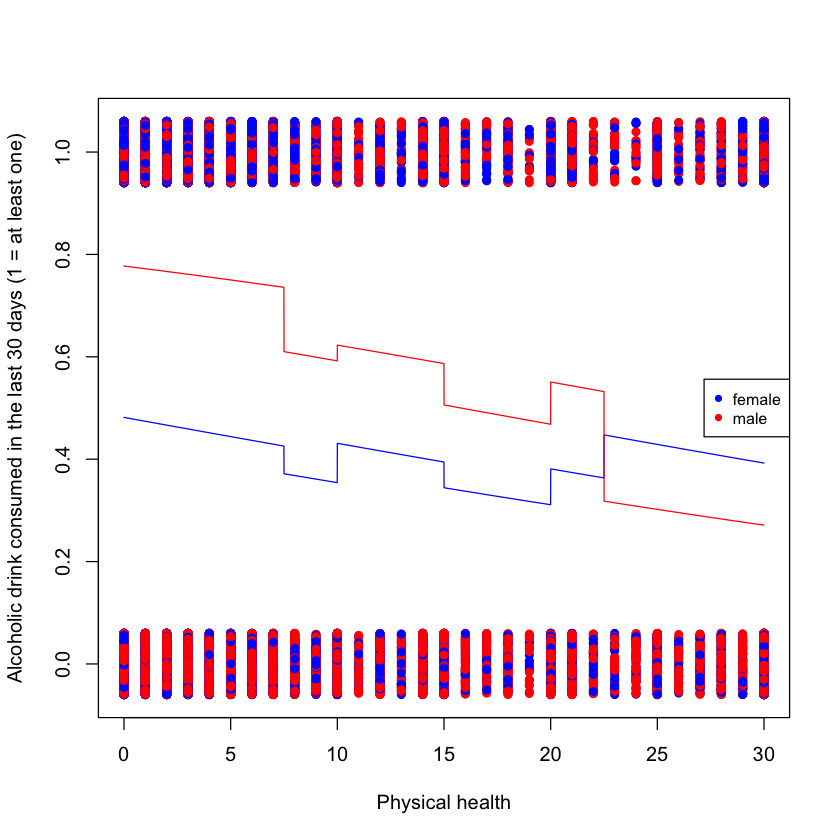

In [23]:
# Plot the data and model fit with color coding
plot(jitter(alcday5_new,f=0.3) ~ physhlth, data=mydata, pch=16, xlab='Physical health', col = c("blue", "red")[as.factor(mydata$sex)],ylab="Alcoholic drink consumed in the last 30 days (1 = at least one)")
lines(mydata.sex.female$physhlth, mydata.sex.female$ynew, lty=1, col="blue")
lines(mydata.sex.male$physhlth, mydata.sex.male$ynew, lty=1, col="red")
legend("right", legend=c("female", "male"),
       col=c("blue","red"), pch=16,cex=0.8)

### Plot of Marital Statues

In [24]:
levels(mydata$marital)

[1] "Married"                         "Divorced"                       
[3] "Widowed"                         "Separated"                      
[5] "Never married"                   "A member of an unmarried couple"

In [141]:
physhlth <- seq(min(mydata$physhlth), max(mydata$physhlth), length.out = 120)

xnew.df <- as.data.frame(physhlth)



xnew.df.6 <- rbind(xnew.df, xnew.df, xnew.df, xnew.df,xnew.df,xnew.df)


sex <- c(rep("Male", 360), rep("Female", 360))
marital <- c(rep("Married", 120), rep("Widowed", 120),rep("Divorced", 120),rep("Separated", 120),rep("Never married", 120),rep("A member of an unmarried couple",120))
income2 <- c(rep("$75,000 or more", 90), rep("Less than $75,000", 90),rep("Less than $50,000", 90),rep("Less than $10,000", 90),rep("Less than $25,000", 90),rep("Less than $20,000", 90),
            rep("Less than $15,000", 90),rep("Less than $35,000", 90))

In [26]:
new.data.3 <- cbind(xnew.df.6, sex, marital, income2)
names(new.data.3) <- c("physhlth", "sex", "marital", "income2")
str(new.data.3)
ynew.3 <- predict(final_model, data.frame(new.data.3), type="response")
new.data.3 <- cbind(new.data.3, ynew.3)

'data.frame':	720 obs. of  4 variables:
 $ physhlth: num  0 0.252 0.504 0.756 1.008 ...
 $ sex     : chr  "Male" "Male" "Male" "Male" ...
 $ marital : chr  "Married" "Married" "Married" "Married" ...
 $ income2 : chr  "$75,000 or more" "$75,000 or more" "$75,000 or more" "$75,000 or more" ...


In [27]:
# Subset the new data into the different marital
mydata.m1 <- subset(new.data.3, new.data.3$marital == "Married" )
mydata.m2 <- subset(new.data.3, new.data.3$marital == "Divorced")
mydata.m3 <- subset(new.data.3, new.data.3$marital == "Widowed")
mydata.m4 <- subset(new.data.3, new.data.3$marital == "Separated")
mydata.m5 <- subset(new.data.3, new.data.3$marital == "Never married")
mydata.m6 <- subset(new.data.3, new.data.3$marital == "A member of an unmarried couple")

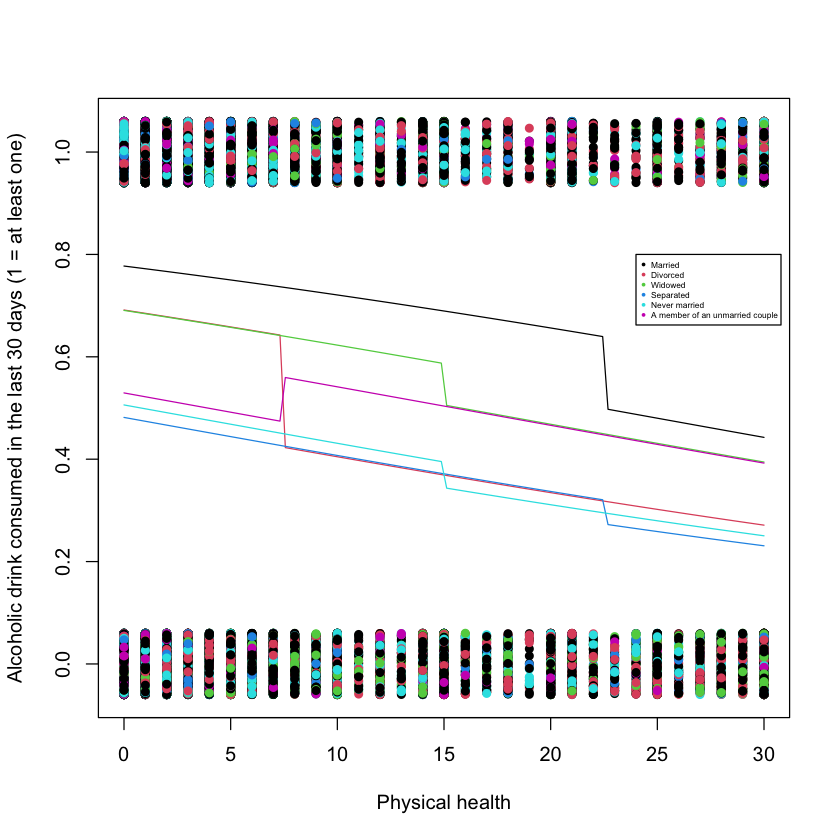

In [28]:
# Plot the data and model fit with color coding
plot(jitter(alcday5_new,f=0.3) ~ physhlth, data=mydata,  xlab='Physical health',pch=16, col = c(1,2,3,4,5,6)[as.factor(mydata$marital)],ylab="Alcoholic drink consumed in the last 30 days (1 = at least one)")
lines(mydata.m1$physhlth, mydata.m1$ynew, lty=1, col=1)
lines(mydata.m2$physhlth, mydata.m2$ynew, lty=1, col=2)
lines(mydata.m3$physhlth, mydata.m3$ynew, lty=1, col=3)
lines(mydata.m4$physhlth, mydata.m4$ynew, lty=1, col=4)
lines(mydata.m5$physhlth, mydata.m5$ynew, lty=1, col=5)
lines(mydata.m6$physhlth, mydata.m6$ynew, lty=1, col=6)
legend(x=24,y=0.8, legend=c("Married", "Divorced","Widowed","Separated","Never married","A member of an unmarried couple"),
       col=c(1,2,3,4,5,6), pch=16,cex=0.42)

### Plot of Income

In [29]:
levels(mydata$income2)

[1] "Less than $10,000" "Less than $15,000" "Less than $20,000"
[4] "Less than $25,000" "Less than $35,000" "Less than $50,000"
[7] "Less than $75,000" "$75,000 or more"

In [142]:
physhlth <- seq(min(mydata$physhlth), max(mydata$physhlth), length.out = 120)

xnew.df <- as.data.frame(physhlth)



xnew.df.8 <- rbind(xnew.df, xnew.df, xnew.df, xnew.df,xnew.df,xnew.df,xnew.df,xnew.df)


sex <- c(rep("Male", 480), rep("Female", 480))
marital <- c(rep("Married", 160), rep("Widowed", 160),rep("Divorced", 160),rep("Separated", 160),rep("Never married", 160),rep("A member of an unmarried couple",160))
income2 <- c(rep("$75,000 or more", 120), rep("Less than $75,000", 120),rep("Less than $50,000", 120),rep("Less than $10,000", 120),rep("Less than $25,000", 120),rep("Less than $20,000", 120),
            rep("Less than $15,000", 120),rep("Less than $35,000", 120))

In [31]:
new.data.4 <- cbind(xnew.df.8, sex, marital, income2)
names(new.data.4) <- c("physhlth", "sex", "marital", "income2")
str(new.data.4)
ynew.4 <- predict(final_model, data.frame(new.data.4), type="response")
new.data.4 <- cbind(new.data.4, ynew.4)

'data.frame':	960 obs. of  4 variables:
 $ physhlth: num  0 0.252 0.504 0.756 1.008 ...
 $ sex     : chr  "Male" "Male" "Male" "Male" ...
 $ marital : chr  "Married" "Married" "Married" "Married" ...
 $ income2 : chr  "$75,000 or more" "$75,000 or more" "$75,000 or more" "$75,000 or more" ...


In [32]:
# Subset the new data into the different income2
mydata.i1 <- subset(new.data.4, new.data.4$income2 == "Less than $10,000" )
mydata.i2 <- subset(new.data.4, new.data.4$income2 == "Less than $15,000")
mydata.i3 <- subset(new.data.4, new.data.4$income2 == "Less than $20,000")
mydata.i4 <- subset(new.data.4, new.data.4$income2 == "Less than $25,000")
mydata.i5 <- subset(new.data.4, new.data.4$income2 == "Less than $35,000")
mydata.i6 <- subset(new.data.4, new.data.4$income2 == "Less than $50,000")
mydata.i7 <- subset(new.data.4, new.data.4$income2 == "Less than $75,000")
mydata.i8 <- subset(new.data.4, new.data.4$income2 == "$75,000 or more")

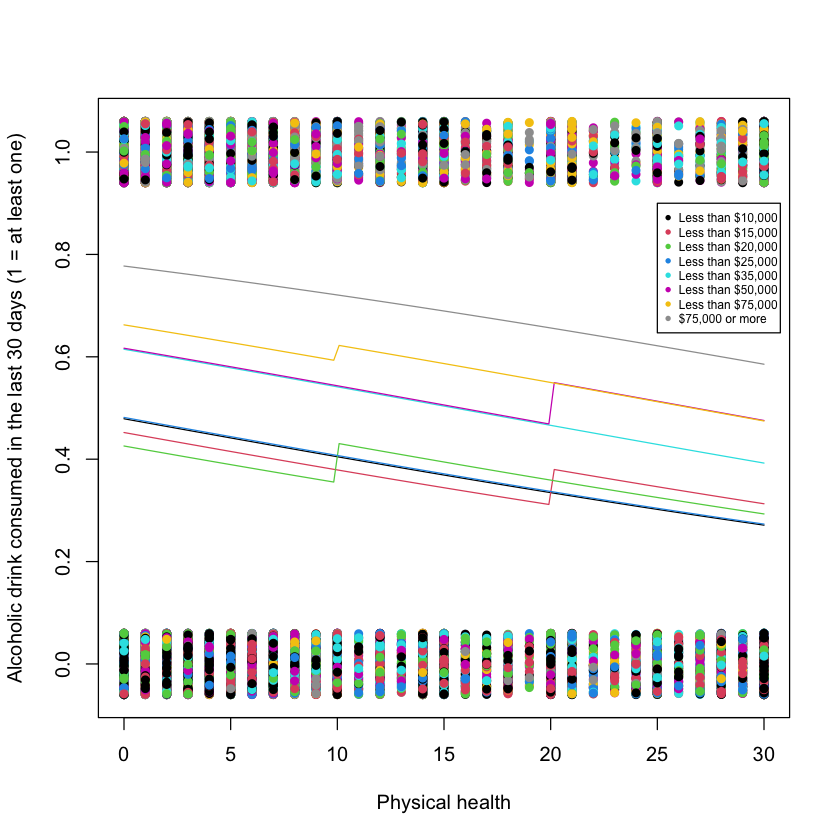

In [33]:
# Plot the data and model fit with color coding
plot(jitter(alcday5_new,f=0.3) ~ physhlth, data=mydata, pch=16, xlab='Physical health',col = c(1,2,3,4,5,6,7,8)[as.factor(mydata$income2)],ylab="Alcoholic drink consumed in the last 30 days (1 = at least one)")
lines(mydata.i1$physhlth, mydata.i1$ynew, lty=1, col=1)
lines(mydata.i2$physhlth, mydata.i2$ynew, lty=1, col=2)
lines(mydata.i3$physhlth, mydata.i3$ynew, lty=1, col=3)
lines(mydata.i4$physhlth, mydata.i4$ynew, lty=1, col=4)
lines(mydata.i5$physhlth, mydata.i5$ynew, lty=1, col=5)
lines(mydata.i6$physhlth, mydata.i6$ynew, lty=1, col=6)
lines(mydata.i7$physhlth, mydata.i7$ynew, lty=1, col=7)
lines(mydata.i8$physhlth, mydata.i8$ynew, lty=1, col=8)
legend(x=25,y=0.90, legend=c("Less than $10,000", "Less than $15,000","Less than $20,000","Less than $25,000","Less than $35,000","Less than $50,000","Less than $75,000","$75,000 or more"),
       col=c(1,2,3,4,5,6,7,8), pch=16,cex=0.6)

### Result discussion

The main result of the final model identifies the relationship between several factors and alcohol consumption.

For example, it is concluded that there is a significant negative relationship between physical health and alcohol consumption. However, due to the measurement of physical health, we can conclude that the better the physical health is, the more likely they will consume alcohol. 


Second, as for sex, women is more unlikely to drink than men. 

Third, for income level, we can conclude that despite there are some income levels that are insignificant, the more income level is, the more likly they will consume alcohol. 

For the marital statues, which is a significant factor, people who are divorced, separated, never married or a member of an unmarried people tend to have positive relationship with alcohol consumption and gradually increasing in degree. But for people who are widowed, they have a negative relationship with drinking alcohol.


Also, an interaction term is established for marital statues and income. And it turned to be positive most of the time which means that the effect of mariral statues on alcohol consumption increases as income increases.

---
## Concerns regarding collinearity? 

According to the VIF score below, it is not an issue that the explanatory variables being related to each other.

It is aso expected that a person's physical health indication can varies depend on their education level, gender, or marital status. Generally, high-income people are more physically healthy, or different genders have different physical capacity, or marital status can affect one physical wellbeing. This is confirmed as each categorical variable's chi-squared test with PHYSHLTH shows a small p-value, thus suggesting that  there is a significant relationship between the continuous variable and the categorical variables.

In [34]:
chisq.test(table(mydata$income2, mydata$physhlth))


Warning message in chisq.test(table(mydata$income2, mydata$physhlth)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(mydata$income2, mydata$physhlth)
X-squared = 17422, df = 210, p-value < 2.2e-16


In [35]:
chisqTest6 <- chisq.test(table(mydata$marital, mydata$physhlth))
print(chisqTest6)

Warning message in chisq.test(table(mydata$marital, mydata$physhlth)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(mydata$marital, mydata$physhlth)
X-squared = 6542.1, df = 150, p-value < 2.2e-16



In [36]:
chisqTest7 <- chisq.test(table(mydata$sex, mydata$physhlth))
print(chisqTest7)


	Pearson's Chi-squared test

data:  table(mydata$sex, mydata$physhlth)
X-squared = 544.47, df = 30, p-value < 2.2e-16



In [37]:
vif(final_model)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



GVIF         Df GVIF^(1/(2*Df))
physhlth        1.063688e+00  1 1.031352       
marital         1.798926e+05  5 3.353523       
income2         2.577960e+03  7 1.752518       
sex             1.025813e+00  1 1.012824       
marital:income2 5.044027e+07 35 1.288367

<div class="alert alert-block alert-info"> 
    
## Classification table 
<div>

Cut-off value of 0.48 is set to maximize the accuracy

In [143]:
# Create an empty dataframe that you will fill 
df <- data.frame(matrix(ncol = 9, nrow = 51))
colnames(df) <- c("true.positive", "true.negative", "false.positive", "false.negative", "correct.percent", "sensitivity", "specificity", "false.pos.rate", "false.neg.rate")


prob.level <- seq(0, 1, length.out=51) # create a vector with different possible probabilities

class.table.data <- cbind(prob.level, df) # combine your vector of probabilities and your empty dataframe


# fill empty cells in your dataframe with 0
class.table.data$true.positive <- rep(c(0), c(51))
class.table.data$true.negative <- rep(c(0), c(51))
class.table.data$false.positive <- rep(c(0), c(51))
class.table.data$false.negative <- rep(c(0), c(51))



# This loop will try out the different probability cut-off values and fill in how many true positive/negatives and false positive/negatives you have based on your data.
for (i in 1:51) {
class.table <- table(mydata$alcday5_new, fitted(final_model) > class.table.data$prob.level[i])

col.true.num <- grep("TRUE", colnames(class.table))
col.false.num <- grep("FALSE", colnames(class.table))

if (length(col.true.num) > 0) {
      class.table.data$false.positive [i] <- class.table[1, col.true.num]
      class.table.data$true.positive [i] <- class.table[2, col.true.num] }

if (length(col.false.num) > 0) {
      class.table.data$true.negative [i] <- class.table[1, col.false.num]
      class.table.data$false.negative [i] <- class.table[2, col.false.num] }  }




# You will use this information to fill in the rest of your classification table.
class.table.data$correct.percent <- (class.table.data$true.positive + class.table.data$true.negative)/nrow(mydata)*100
class.table.data$sensitivity <- (class.table.data$true.positive)/sum(mydata$alcday5_new)*100
class.table.data$specificity <- (class.table.data$true.negative)/(nrow(mydata) - sum(mydata$alcday5_new))*100
class.table.data$false.neg.rate <- (class.table.data$false.negative)/sum(mydata$alcday5_new)*100
class.table.data$false.pos.rate <- (class.table.data$false.positive)/(nrow(mydata) - sum(mydata$alcday5_new))*100
class.table.data

max_correct_percent_row <- which.max(class.table.data$correct.percent)
max_correct_percent_row

max_correct_percent_cutoff <- class.table.data$prob.level[max_correct_percent_row]
max_correct_percent_cutoff

prob.level true.positive true.negative false.positive false.negative
1  0.00       99809             0         96864              0         
2  0.02       99809             0         96864              0         
3  0.04       99809             0         96864              0         
4  0.06       99809             0         96864              0         
5  0.08       99809             0         96864              0         
6  0.10       99809             0         96864              0         
7  0.12       99617          1270         95594            192         
8  0.14       99594          1386         95478            215         
9  0.16       99330          2969         93895            479         
10 0.18       99067          4255         92609            742         
11 0.20       98249          7829         89035           1560         
12 0.22       97703          9694         87170           2106         
13 0.24       96441         13954         82910           3368         
14 0.26       95926         15703         81161           3883         
15 0.28       94300         19884         76980           5509         
16 0.30       92982         23191         73673           6827         
17 0.32       91418         26642         70222           8391         
18 0.34       89695         30278         66586          10114         
19 0.36       87868         33837         63027          11941         
20 0.38       85034         38588         58276          14775         
21 0.40       83193         41671         55193          16616         
22 0.42       80819         45030         51834          18990         
23 0.44       78068         48500         48364          21741         
24 0.46       75234         51957         44907          24575         
25 0.48       71830         55845         41019          27979         
26 0.50       67906         59723         37141          31903         
27 0.52       64714         62837         34027          35095         
28 0.54       61554         65821         31043          38255         
29 0.56       55307         70811         26053          44502         
30 0.58       52336         73153         23711          47473         
31 0.60       48126         76098         20766          51683         
32 0.62       44930         78073         18791          54879         
33 0.64       42353         79640         17224          57456         
34 0.66       36710         82828         14036          63099         
35 0.68       28089         86957          9907          71720         
36 0.70       18747         90868          5996          81062         
37 0.72       17237         91438          5426          82572         
38 0.74       14952         92325          4539          84857         
39 0.76       11333         93585          3279          88476         
40 0.78        2170         96369           495          97639         
41 0.80        1859         96453           411          97950         
42 0.82         619         96751           113          99190         
43 0.84         432         96792            72          99377         
44 0.86         332         96811            53          99477         
45 0.88           0         96864             0          99809         
46 0.90           0         96864             0          99809         
47 0.92           0         96864             0          99809         
48 0.94           0         96864             0          99809         
49 0.96           0         96864             0          99809         
50 0.98           0         96864             0          99809         
51 1.00           0         96864             0          99809         
   correct.percent sensitivity specificity false.pos.rate false.neg.rate
1  50.74870        100.0000000   0.000000  100.00000000     0.0000000   
2  50.74870        100.0000000   0.000000  100.00000000     0.0000000   
3  50.74870        100.0000000   0.00000

[1] 25

[1] 0.48

<div class="alert alert-block alert-info"> 
    
## ROC curve + AUC 
<div>

The AUC value is 0.701973552821287. Since an AUC value between 0.7 and 0.8 is generally considered acceptable discrimination performance for a logistic regression model, the AUC value of 0.70 suggests that the model has a moderate ability to distinguish between individuals who consume alcohol and those who do not. Specifically, we can still improve on the sensitity, since our model may perform poor at correctly identifying the actual positives.

[1] 0.7019736

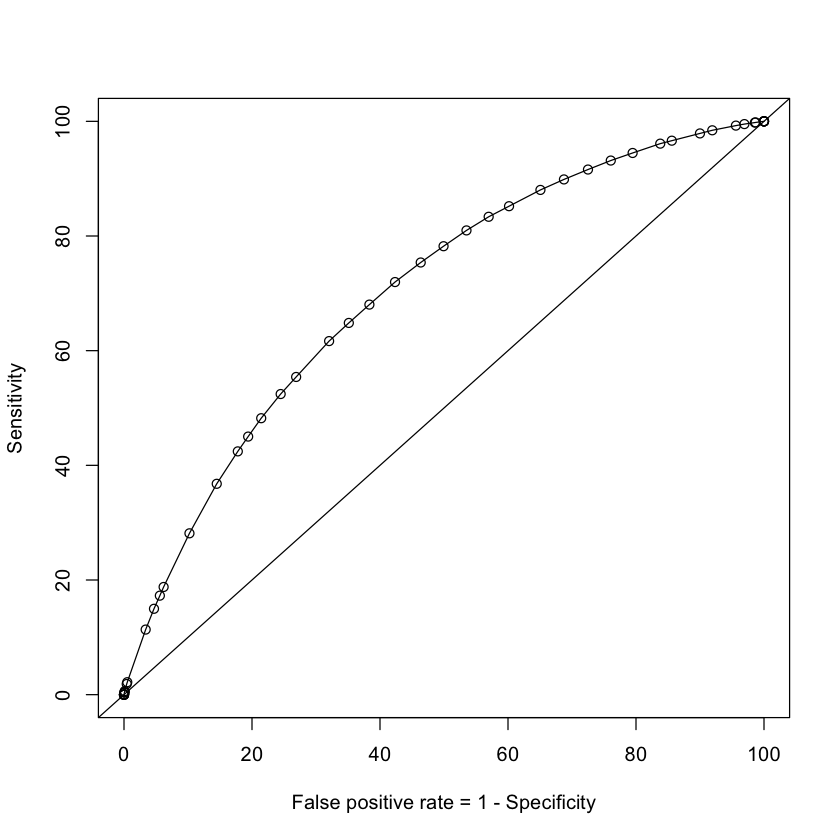

In [39]:
plot(class.table.data$sensitivity ~ class.table.data$false.pos.rate, data=class.table.data, ylab = "Sensitivity", xlab = "False positive rate = 1 - Specificity")
lines(sensitivity ~ false.pos.rate, data=class.table.data)
abline(0, 1)

x <- class.table.data$false.pos.rate/100
y <- class.table.data$sensitivity/100
id <- order(x)

AUC <- sum(diff(x[id])*rollmean(y[id],2)); AUC # average of left and right to create rectangle; then take sum of all the pieces

<div class="alert alert-block alert-danger">
<a id="Data_prep2"></a>

# Data preparation for Poisson regression 
</div>

#### Data processing

In [40]:
poisson.data <- filter(mydata , mydata$drnk3ge5 != 0)


str(poisson.data)
head(poisson.data)

'data.frame':	28174 obs. of  11 variables:
 $ physhlth   : int  3 2 1 0 1 0 10 5 0 0 ...
 $ menthlth   : int  2 0 2 30 0 5 0 2 25 2 ...
 $ poorhlth   : int  0 2 0 0 1 0 5 0 20 0 ...
 $ sleptim1   : int  9 7 7 7 9 6 7 8 6 8 ...
 $ marital    : Factor w/ 6 levels "Married","Divorced",..: 1 5 2 2 1 1 1 5 5 1 ...
 $ educa      : Factor w/ 6 levels "Never attended school or only kindergarten",..: 6 5 6 5 6 6 6 4 6 4 ...
 $ income2    : Factor w/ 8 levels "Less than $10,000",..: 8 4 3 5 8 8 6 8 7 6 ...
 $ sex        : Factor w/ 2 levels "Male","Female": 2 2 1 2 1 2 2 1 1 2 ...
 $ alcday5    : int  220 207 103 205 107 103 103 103 215 204 ...
 $ drnk3ge5   : num  20 5 2 1 1 1 3 2 15 1 ...
 $ alcday5_new: num  1 1 1 1 1 1 1 1 1 1 ...


physhlth menthlth poorhlth sleptim1 marital      
1 3         2       0        9        Married      
2 2         0       2        7        Never married
3 1         2       0        7        Divorced     
4 0        30       0        7        Divorced     
5 1         0       1        9        Married      
6 0         5       0        6        Married      
  educa                                                       
1 College 4 years or more (College graduate)                  
2 College 1 year to 3 years (Some college or technical school)
3 College 4 years or more (College graduate)                  
4 College 1 year to 3 years (Some college or technical school)
5 College 4 years or more (College graduate)                  
6 College 4 years or more (College graduate)                  
  income2           sex    alcday5 drnk3ge5 alcday5_new
1 $75,000 or more   Female 220     20       1          
2 Less than $25,000 Female 207      5       1          
3 Less than $20,000 Male   103      2       1          
4 Less than $35,000 Female 205      1       1          
5 $75,000 or more   Male   107      1       1          
6 $75,000 or more   Female 103      1       1

#### Number of eligible observations

In [41]:
nrow(poisson.data)

[1] 28174

<div class="alert alert-block alert-warning">
<a id="EDA2"></a>

# Exploring the response variable
    
The focus of this analysis is to examine variables associated with consuming more than the recommended maximum of alcohol. The focus is only on individuals who have consumed at least one alcohol drink in the past 30 days (this helps remove excess 0's). The variable `drnk3ge5` will be used as the response variable.  
<br>

</div>

Initial visualization might suggests that the observed frequency follows a Poisson distribution since it is right-skewed. However, if we compare it to the distribution of the simulated data, we find that the observations have **higher max frequency**, and its **right tail is longer (overdispersed)**. This is also confirmed with **variance (36.24) being higher than mean (4.35)**. It even looks amost like a bimodal distribution with how many extreme observations there are.

The goodness of fit test also shows that the **p-value is lower than 5%**. Therefore, we **reject the null hypothesis that the observed data follows a Poisson distribution**.

In [42]:
#Summary statistics

drnk3ge5.mean <- mean(poisson.data$drnk3ge5)
drnk3ge5.mean
drnk3ge5.var <- var(poisson.data$drnk3ge5)
drnk3ge5.var
drnk3ge5.size <- length(poisson.data$drnk3ge5)
drnk3ge5.size



[1] 4.348974

[1] 36.23671

[1] 28174

Var1 Freq 
1  1    10093
2  2     5819
3  3     2729
4  4     2533
5  5     1868
6  6      731
7  7      447
8  8      628
9  9       61
10 10     984
11 11      11
12 12     235
13 13      17
14 14      58
15 15     459
16 16      36
17 17      15
18 18      16
19 19       1
20 20     351
21 21      14
22 22       9
23 23      13
24 24      20
25 25     135
26 26       9
27 27      10
28 28      51
29 29      15
30 30     806

poisson.sim Freq
1  0            354
2  1           1610
3  2           3354
4  3           5000
5  4           5520
6  5           4749
7  6           3483
8  7           2066
9  8           1103
10 9            568
11 10           235
12 11            79
13 12            37
14 13            12
15 14             3
16 15             1

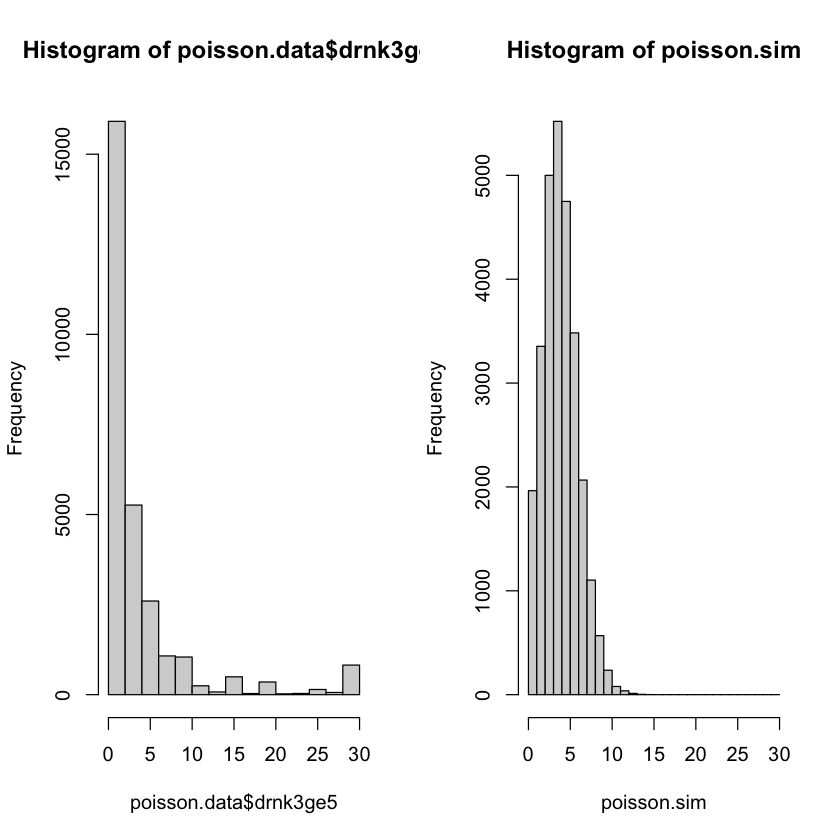

In [43]:
#Simulated Poisson distribution

poisson.sim <- rpois(drnk3ge5.size, drnk3ge5.mean) 

#Distribution comparision

data.frame(table(poisson.data$drnk3ge5))
data.frame(table(poisson.sim))

par(mfrow = c(1,2))
observed.distribution <- hist(poisson.data$drnk3ge5)
simulated.distribution <- hist(poisson.sim, breaks=seq(0, 30, by=1))

In [44]:
#Goodness of fit test
expected.freq <- vector("numeric"); expected.freq

for (i in 1:12) {
  expected.freq [i] <- exp(-drnk3ge5.mean)*drnk3ge5.mean^(i-1)/factorial(i-1)*drnk3ge5.size
}

expected.freq[13] <- c(drnk3ge5.size-sum(expected.freq))
expected.freq <- as.data.frame(expected.freq)

frequency.table <- as.data.frame(table(poisson.data$drnk3ge5))
frequency.table$Freq[13] <- sum(frequency.table$Freq[13:29]) 
frequency.table$Var1 <- as.numeric(as.character(frequency.table$Var1))
frequency.table.new <- subset(frequency.table, frequency.table$Var1 < 14)
freq.table <- cbind(frequency.table.new, expected.freq); freq.table


numeric(0)

Var1 Freq  expected.freq
1   1   10093  364.00974   
2   2    5819 1583.06896   
3   3    2729 3442.36306   
4   4    2533 4990.24941   
5   5    1868 5425.61653   
6   6     731 4719.17329   
7   7     447 3420.59384   
8   8     628 2125.15350   
9   9      61 1155.27972   
10 10     984  558.25353   
11 11      11  242.78302   
12 12     235   95.98701   
13 13    1229   51.46838

In [45]:
chisq.test(freq.table$Freq, p=freq.table$expected.freq/drnk3ge5.size)


	Chi-squared test for given probabilities

data:  freq.table$Freq
X-squared = 319918, df = 12, p-value < 2.2e-16


<div class="alert alert-block alert-warning">
<a id="EDA2"></a>

# Predictions and Exploratory Data Analysis for Poisson Regression 
</div>

In [46]:
str(poisson.data)
head(poisson.data)

'data.frame':	28174 obs. of  11 variables:
 $ physhlth   : int  3 2 1 0 1 0 10 5 0 0 ...
 $ menthlth   : int  2 0 2 30 0 5 0 2 25 2 ...
 $ poorhlth   : int  0 2 0 0 1 0 5 0 20 0 ...
 $ sleptim1   : int  9 7 7 7 9 6 7 8 6 8 ...
 $ marital    : Factor w/ 6 levels "Married","Divorced",..: 1 5 2 2 1 1 1 5 5 1 ...
 $ educa      : Factor w/ 6 levels "Never attended school or only kindergarten",..: 6 5 6 5 6 6 6 4 6 4 ...
 $ income2    : Factor w/ 8 levels "Less than $10,000",..: 8 4 3 5 8 8 6 8 7 6 ...
 $ sex        : Factor w/ 2 levels "Male","Female": 2 2 1 2 1 2 2 1 1 2 ...
 $ alcday5    : int  220 207 103 205 107 103 103 103 215 204 ...
 $ drnk3ge5   : num  20 5 2 1 1 1 3 2 15 1 ...
 $ alcday5_new: num  1 1 1 1 1 1 1 1 1 1 ...


physhlth menthlth poorhlth sleptim1 marital      
1 3         2       0        9        Married      
2 2         0       2        7        Never married
3 1         2       0        7        Divorced     
4 0        30       0        7        Divorced     
5 1         0       1        9        Married      
6 0         5       0        6        Married      
  educa                                                       
1 College 4 years or more (College graduate)                  
2 College 1 year to 3 years (Some college or technical school)
3 College 4 years or more (College graduate)                  
4 College 1 year to 3 years (Some college or technical school)
5 College 4 years or more (College graduate)                  
6 College 4 years or more (College graduate)                  
  income2           sex    alcday5 drnk3ge5 alcday5_new
1 $75,000 or more   Female 220     20       1          
2 Less than $25,000 Female 207      5       1          
3 Less than $20,000 Male   103      2       1          
4 Less than $35,000 Female 205      1       1          
5 $75,000 or more   Male   107      1       1          
6 $75,000 or more   Female 103      1       1

### 1. Physical health

It is expected that there is a negative relationship between poor physical health and excessive drinking (sick, injured people drink less). However, the plot shows that the lowess line only drops a little at early PHYSHLTH values, but gains positive slope as PHYSHLTH increases.

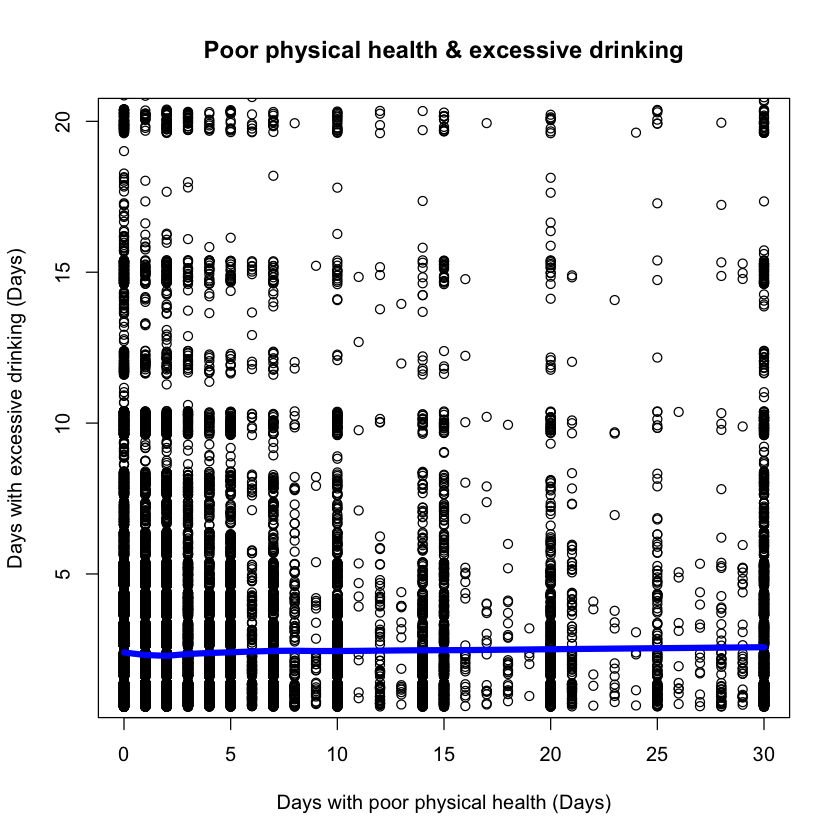

In [47]:
plot(jitter(drnk3ge5, f=2) ~ physhlth, 
     data = poisson.data, 
     ylim = c(1,20), 
      
     xlab = 'Days with poor physical health (Days)', 
     ylab = 'Days with excessive drinking (Days)', 
     main = 'Poor physical health & excessive drinking')
lines(lowess(poisson.data$physhlth, poisson.data$drnk3ge5), lwd=5, col='blue')

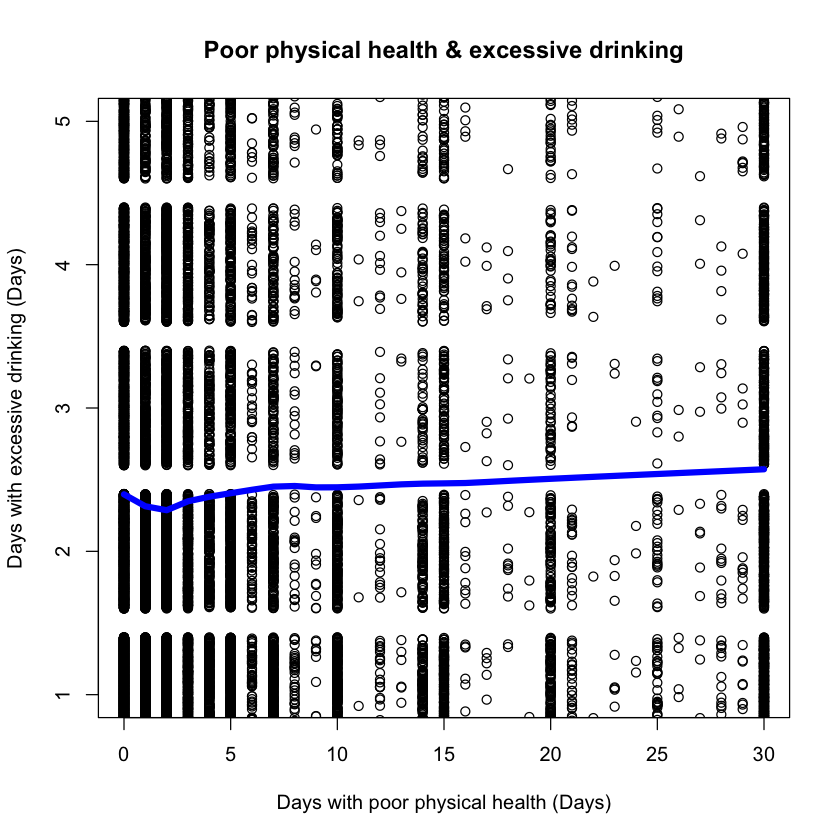

In [48]:
plot(jitter(drnk3ge5, f=2) ~ physhlth, 
     data = poisson.data, 
     ylim = c(1,5), 
      
     xlab = 'Days with poor physical health (Days)', 
     ylab = 'Days with excessive drinking (Days)', 
     main = 'Poor physical health & excessive drinking')
lines(lowess(poisson.data$physhlth, poisson.data$drnk3ge5), lwd=5, col='blue')

### 2. Mental health

It is expected that there is a positive relationship between poor mental health and excessive drinking (depressed people drink more). The plot confirms that the lowess line has positive slope across MNTHLTH values.

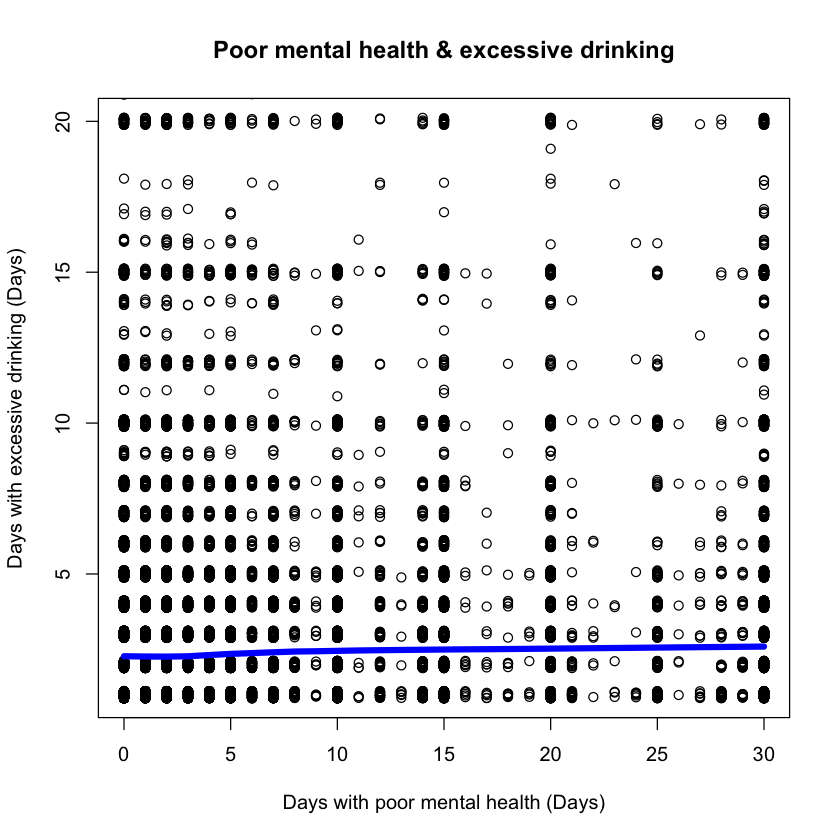

In [49]:
plot(jitter(drnk3ge5, f=0.6) ~ menthlth, 
     data = poisson.data,
     ylim = c(1,20), 
      
     xlab = 'Days with poor mental health (Days)', 
     ylab = 'Days with excessive drinking (Days)', 
     main = 'Poor mental health & excessive drinking')
lines(lowess(poisson.data$menthlth, poisson.data$drnk3ge5), lwd = 5, col = 'blue')

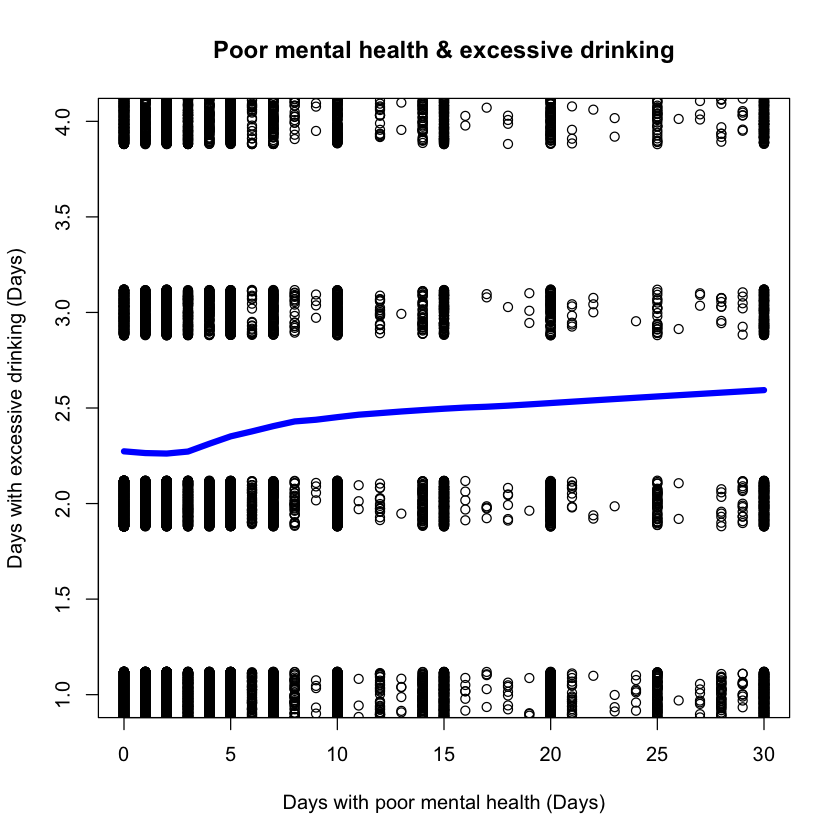

In [50]:
plot(jitter(drnk3ge5, f=0.6) ~ menthlth, 
     data = poisson.data,
     ylim = c(1,4), 
      
     xlab = 'Days with poor mental health (Days)', 
     ylab = 'Days with excessive drinking (Days)', 
     main = 'Poor mental health & excessive drinking')
lines(lowess(poisson.data$menthlth, poisson.data$drnk3ge5), lwd = 5, col = 'blue')

### 3. Poor health

It is expected that there is a positive relationship between very poor health and excessive drinking. The plot confirms that the lowess line gains positive slope as POORHLTH increases. However, there is a smal drop at the early POORHLTH values (very sick people cannot drink much at first).

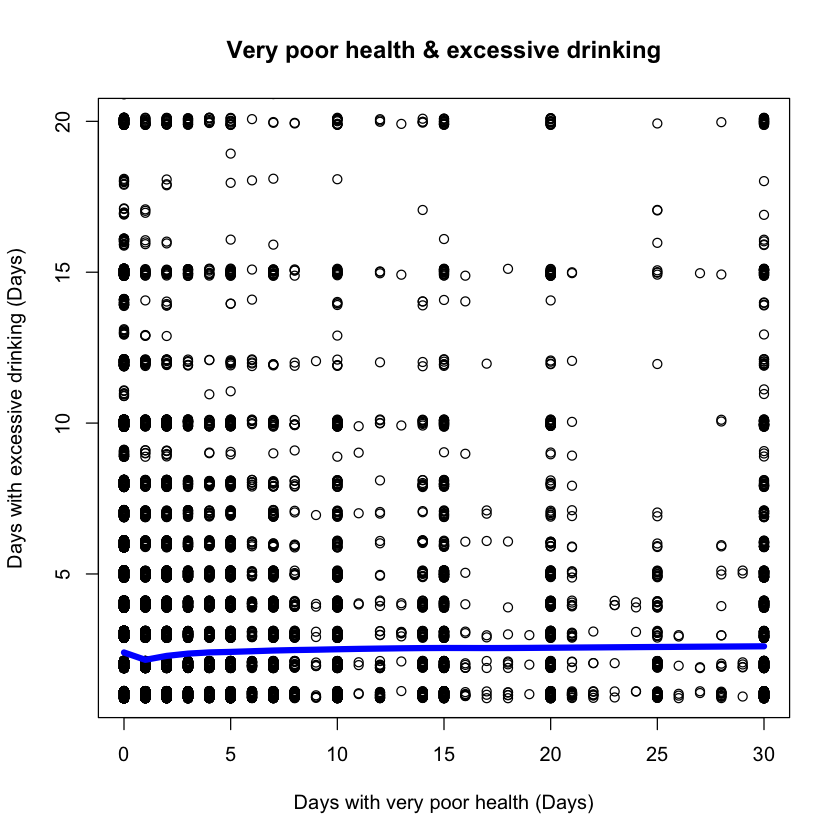

In [51]:
plot(jitter(drnk3ge5, f=0.6) ~ poorhlth, 
     data = poisson.data, 
     ylim = c(1,20), 
     xlab = 'Days with very poor health (Days)', 
     ylab = 'Days with excessive drinking (Days)', 
     main = 'Very poor health & excessive drinking')
lines(lowess(poisson.data$poorhlth, poisson.data$drnk3ge5), lwd =5, col = 'blue')

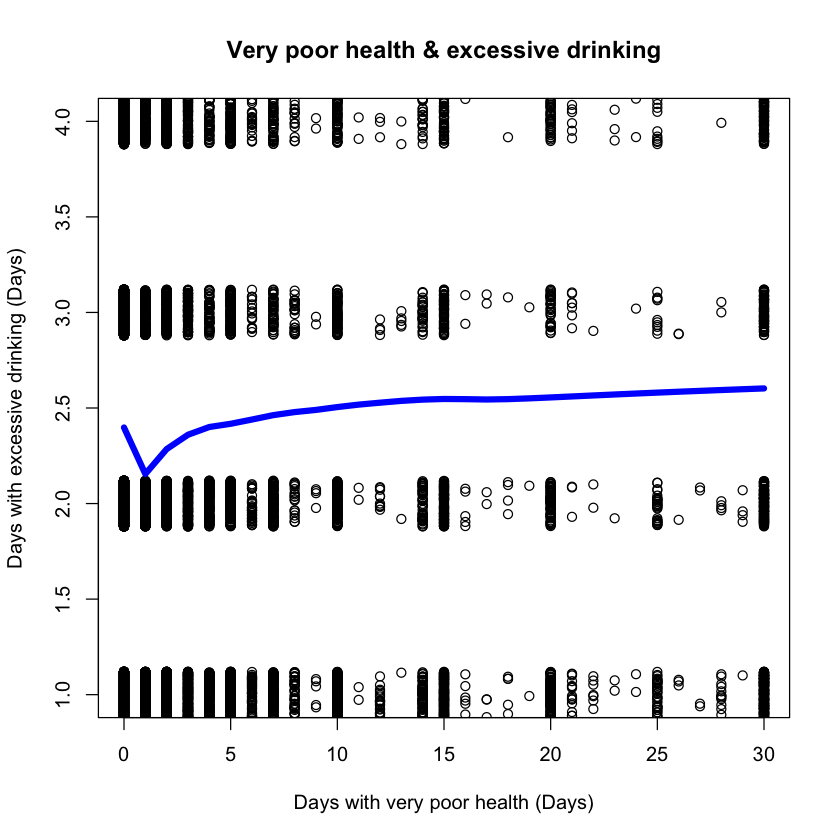

In [52]:
plot(jitter(drnk3ge5, f=0.6) ~ poorhlth, 
     data = poisson.data, 
     ylim = c(1,4), 
     xlab = 'Days with very poor health (Days)', 
     ylab = 'Days with excessive drinking (Days)', 
     main = 'Very poor health & excessive drinking')
lines(lowess(poisson.data$poorhlth, poisson.data$drnk3ge5), lwd =5, col = 'blue')

### 4. Average amount of sleep

It is expected that people who sleeps close to 8 hours/day will drink less. The plot confirms that the lowess line reaches the lowest around 8 SLEPTIM1, and increases the further SLEPTIM1 is from 8.

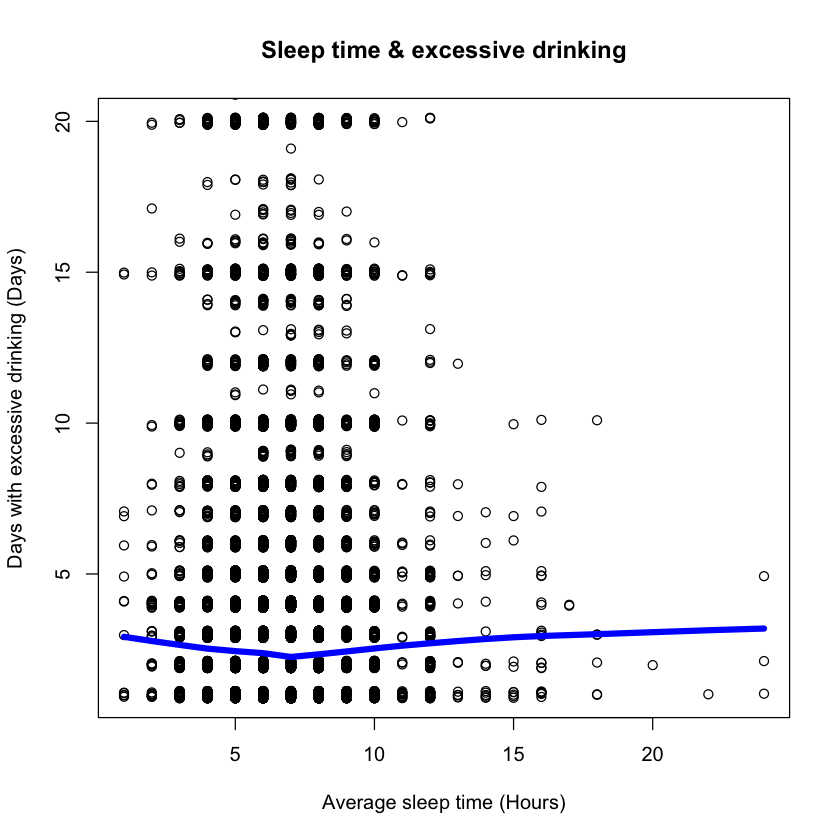

In [53]:
plot(jitter(drnk3ge5, f=0.6) ~ sleptim1, 
     data = poisson.data,
     ylim = c(1,20), 
     xlab = 'Average sleep time (Hours)', 
     ylab = 'Days with excessive drinking (Days)', 
     main = 'Sleep time & excessive drinking')
lines(lowess(poisson.data$sleptim1, poisson.data$drnk3ge5), lwd =5, col = 'blue')

### 5. Marital status

It is expected that marital status has a significant effect, assuming that married people drink less. This is confirmed with significant differences between the mean of at least 2 levels.

In [54]:
cbind(aggregate(poisson.data$drnk3ge5, by = list(poisson.data$marital), FUN = mean), 
      as.data.frame(table(poisson.data$marital))[,2])

married <- poisson.data[poisson.data$marital == 'Married',10]
never.married <- poisson.data[poisson.data$marital == 'Never married',10]
divorced <- poisson.data[poisson.data$marital == 'Divorced',10]
separated <- poisson.data[poisson.data$marital == 'Separated',10]
widowed <- poisson.data[poisson.data$marital == 'Widowed',10]
unmarried.couple <- poisson.data[poisson.data$marital == 'A member of an unmarried couple',10]

marital <- data.frame(value = c(married,never.married,divorced,separated,widowed,unmarried.couple),
                      group = factor(rep(c("married","never married","divorced","separated","widowed","unmarried couple"), 
                                         c(length(married),length(never.married),length(divorced),length(separated),length(widowed),length(unmarried.couple)))))
marital.model <- aov(value~group ,data = marital)
summary(marital.model)



Group.1                         x       
1 Married                         3.855884
2 Divorced                        5.382745
3 Widowed                         5.417790
4 Separated                       4.931585
5 Never married                   4.355232
6 A member of an unmarried couple 4.236826
  as.data.frame(table(poisson.data$marital))[, 2]
1 12143                                          
2  4277                                          
3  1113                                          
4   877                                          
5  8113                                          
6  1651

               Df  Sum Sq Mean Sq F value Pr(>F)    
group           5    9113  1822.7   50.74 <2e-16 ***
Residuals   28168 1011783    35.9                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In order to improve the analysis, levels with little significant differences in means are merged.

In [55]:
#Significance test for 'Divorced' & 'Separated'
separated.divorced <- subset(poisson.data, marital %in% c("Divorced", "Separated"))
summary(aov(drnk3ge5~marital ,data = separated.divorced))

              Df Sum Sq Mean Sq F value Pr(>F)  
marital        1    148  148.13   2.719 0.0992 .
Residuals   5152 280688   54.48                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [56]:
#Merge marital level
poisson.data$marital <- fct_recode(poisson.data$marital, "Divorced/Separated" = "Divorced", "Divorced/Separated" = "Separated")
cbind(aggregate(poisson.data$drnk3ge5, by = list(poisson.data$marital), FUN = mean), 
      as.data.frame(table(poisson.data$marital))[,2])

Group.1                         x       
1 Married                         3.855884
2 Divorced/Separated              5.305976
3 Widowed                         5.417790
4 Never married                   4.355232
5 A member of an unmarried couple 4.236826
  as.data.frame(table(poisson.data$marital))[, 2]
1 12143                                          
2  5154                                          
3  1113                                          
4  8113                                          
5  1651

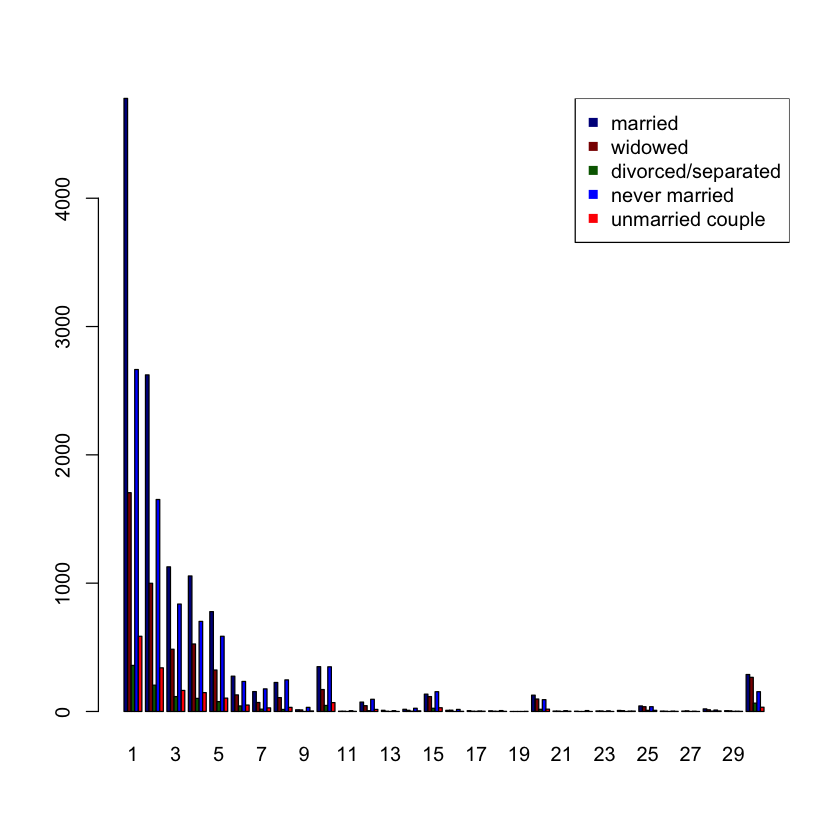

In [57]:
barplot(table(poisson.data$marital, poisson.data$drnk3ge5), beside=TRUE, col=c("darkblue","darkred", "darkgreen", "blue","red"))
legend("topright", legend=c("married", "widowed", "divorced/separated","never married","unmarried couple"),
       col=c("darkblue","darkred", "darkgreen", "blue","red"), pch=15)

### 6. Education

It is expected that education level has a significant effect, assuming that more educated people drink less. This is confirmed with significant differences between the mean of at least 2 levels.

In [58]:
cbind(aggregate(poisson.data$drnk3ge5, by = list(poisson.data$educa), FUN = mean), 
      as.data.frame(table(poisson.data$educa))[,2])

none <- poisson.data[poisson.data$edu == 'Never attended school or only kindergarten',10]
elementary <- poisson.data[poisson.data$edu == 'Grades 1 through 8 (Elementary)',10]
high <- poisson.data[poisson.data$edu == 'Grades 9 though 11 (Some high school)',10]
high.grad <- poisson.data[poisson.data$edu == 'Grade 12 or GED (High school graduate)',10]
college <- poisson.data[poisson.data$edu == 'College 1 year to 3 years (Some college or technical school)',10]
college.grad <- poisson.data[poisson.data$marital == 'College 4 years or more (College graduate)',10]

edu <- data.frame(value = c(none,elementary,high,high.grad,college,college.grad),
                      group = factor(rep(c("none","elementary","high","high.grad","college","college.grad"), 
                                         c(length(none),length(elementary),length(high),length(high.grad),length(college),length(college.grad)))))
edu.model <- aov(value~group ,data = edu)
summary(edu.model)

Group.1                                                      x       
1 Never attended school or only kindergarten                   3.181818
2 Grades 1 through 8 (Elementary)                              5.766332
3 Grades 9 though 11 (Some high school)                        5.786754
4 Grade 12 or GED (High school graduate)                       5.155348
5 College 1 year to 3 years (Some college or technical school) 4.394874
6 College 4 years or more (College graduate)                   3.511876
  as.data.frame(table(poisson.data$educa))[, 2]
1    22                                        
2   398                                        
3  1374                                        
4  7274                                        
5  8623                                        
6 10483

               Df Sum Sq Mean Sq F value Pr(>F)    
group           4   4065  1016.3   23.53 <2e-16 ***
Residuals   17686 763822    43.2                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In order to improve the analysis, levels with little significant differences in means are merged.

In [59]:
#Significance test for 'Never' & 'Elementary'
kids <- subset(poisson.data, educa %in% c("Never attended school or only kindergarten", "Grades 1 through 8 (Elementary)"))
summary(aov(drnk3ge5~educa ,data = kids))

             Df Sum Sq Mean Sq F value Pr(>F)
educa         1    139  139.26   2.096  0.148
Residuals   418  27771   66.44               

In [60]:
#Merge education levels
poisson.data$educa <- fct_recode(poisson.data$educa, 
                                 "Children" = "Never attended school or only kindergarten",
                                 "Children" = "Grades 1 through 8 (Elementary)")
cbind(aggregate(poisson.data$drnk3ge5, by = list(poisson.data$educa), FUN = mean), 
      as.data.frame(table(poisson.data$educa))[,2])

Group.1                                                      x       
1 Children                                                     5.630952
2 Grades 9 though 11 (Some high school)                        5.786754
3 Grade 12 or GED (High school graduate)                       5.155348
4 College 1 year to 3 years (Some college or technical school) 4.394874
5 College 4 years or more (College graduate)                   3.511876
  as.data.frame(table(poisson.data$educa))[, 2]
1   420                                        
2  1374                                        
3  7274                                        
4  8623                                        
5 10483

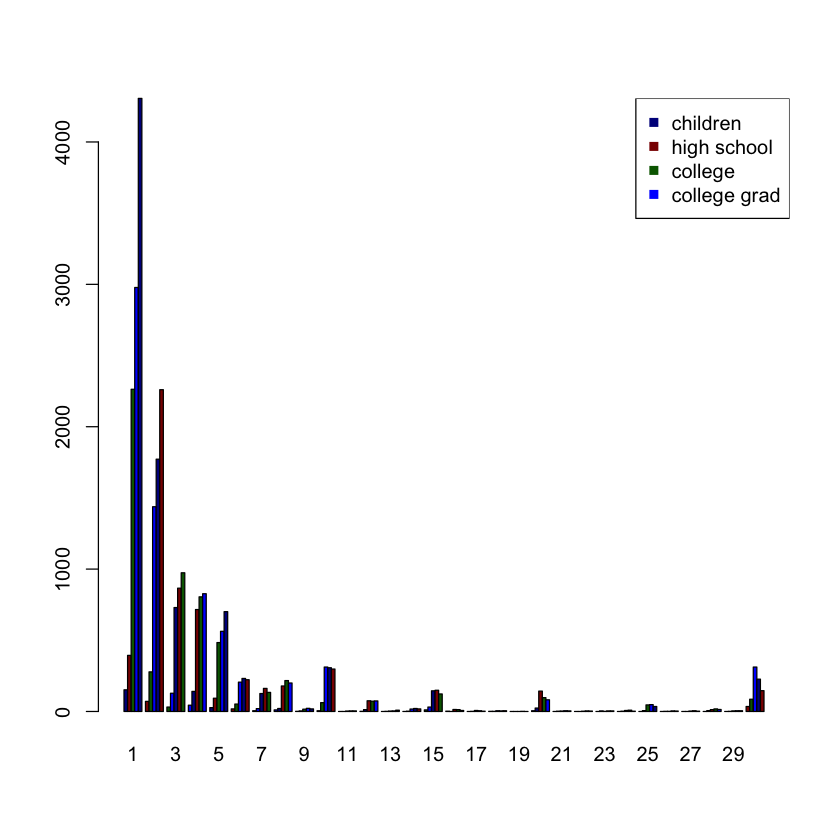

In [61]:
barplot(table(poisson.data$educa, poisson.data$drnk3ge5), beside=TRUE, col=c("darkblue","darkred", "darkgreen", "blue"))
legend("topright", legend=c("children", "high school","college","college grad"),
       col=c("darkblue","darkred", "darkgreen", "blue"), pch=15)

### 7. Income

It is expected that income level does not have a significant effect, since low-income people have both reasons to drink more or less, as well as high-income people. However, the significant differences between the mean of at least 2 levels show that this variable is significant in prediction.

In [62]:
cbind(aggregate(poisson.data$drnk3ge5, by = list(poisson.data$income2), FUN = mean), 
      as.data.frame(table(poisson.data$income2))[,2])

l10k <- poisson.data[poisson.data$income2 == 'Less than $10,000',10]
l15k <- poisson.data[poisson.data$income2 == 'Less than $15,000',10]
l20k <- poisson.data[poisson.data$income2 == 'Less than $20,000',10]
l25k <- poisson.data[poisson.data$income2 == 'Less than $25,000',10]
l35k <- poisson.data[poisson.data$income2 == 'Less than $35,000',10]
l50k <- poisson.data[poisson.data$income2 == 'Less than $50,000',10]
l75k <- poisson.data[poisson.data$income2 == 'Less than $75,000',10]
ge75k <- poisson.data[poisson.data$income2 == '$75,000 or more',10]

income <- data.frame(value = c(l10k,l15k,l20k,l25k,l35k,l50k,l75k,ge75k),
                      group = factor(rep(c('Less than $10,000','Less than $15,000','Less than $20,000','Less than $25,000','Less than $35,000','Less than $50,000','Less than $75,000','$75,000 or more'), 
                                         c(length(l10k),length(l15k),length(l20k),length(l25k),length(l35k),length(l50k),length(l75k),length(ge75k)))))
income.model <- aov(value~group ,data = income)
summary(income.model)


Group.1           x        as.data.frame(table(poisson.data$income2))[, 2]
1 Less than $10,000 5.420601 1864                                           
2 Less than $15,000 5.276942 1596                                           
3 Less than $20,000 4.840641 2121                                           
4 Less than $25,000 4.847800 2477                                           
5 Less than $35,000 4.740526 2929                                           
6 Less than $50,000 4.506422 3971                                           
7 Less than $75,000 4.092000 4500                                           
8 $75,000 or more   3.617829 8716

               Df  Sum Sq Mean Sq F value Pr(>F)    
group           7   10148  1449.7    40.4 <2e-16 ***
Residuals   28166 1010749    35.9                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In order to improve the analysis, levels with little significant differences in means are merged.

In [63]:
#Significance test for 'le10k' to 'le15k'
le15 <- subset(poisson.data, income2 %in% c("Less than $10,000", "Less than $15,000"))
summary(aov(drnk3ge5~income2 ,data = le15))

              Df Sum Sq Mean Sq F value Pr(>F)
income2        1     18   17.74   0.333  0.564
Residuals   3458 184006   53.21               

In [64]:
#Significance test for 'le20k' to 'le35k'
le35 <- subset(poisson.data, income2 %in% c("Less than $20,000", "Less than $25,000","Less than $35,000"))
summary(aov(drnk3ge5~income2 ,data = le35))

              Df Sum Sq Mean Sq F value Pr(>F)
income2        2     19    9.70   0.227  0.797
Residuals   7524 321697   42.76               

In [65]:
#Merge income levels
poisson.data$income2 <- fct_recode(poisson.data$income2, 
                                   "Less than $15,000" = "Less than $10,000", 
                                   "Less than $35,000" = "Less than $20,000", 
                                   "Less than $35,000" = "Less than $25,000")  
                                   

cbind(aggregate(poisson.data$drnk3ge5, by = list(poisson.data$income2), FUN = mean), 
      as.data.frame(table(poisson.data$income2))[,2])

Group.1           x        as.data.frame(table(poisson.data$income2))[, 2]
1 Less than $15,000 5.354335 3460                                           
2 Less than $35,000 4.804039 7527                                           
3 Less than $50,000 4.506422 3971                                           
4 Less than $75,000 4.092000 4500                                           
5 $75,000 or more   3.617829 8716

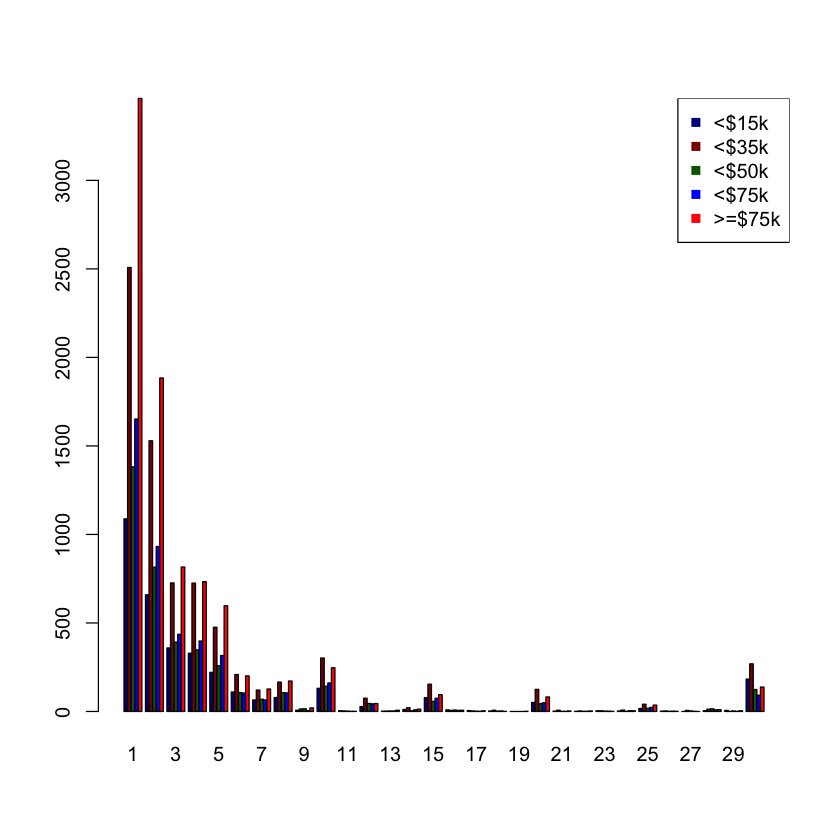

In [66]:
barplot(table(poisson.data$income2, poisson.data$drnk3ge5), beside=TRUE, col=c("darkblue","darkred", "darkgreen", "blue","red"))
legend("topright", legend=c("<$15k","<$35k","<$50k","<$75k",'>=$75k'),
       col=c("darkblue","darkred", "darkgreen", "blue","red"), pch=15)

### 8. Sex/gender

It is expected that sex/gender has a significant effect, assuming that males drink more than females. This is confirmed with significant differences between the mean of these 2 levels.

In [67]:
cbind(aggregate(poisson.data$drnk3ge5, by = list(poisson.data$sex), FUN = mean),
      as.data.frame(table(poisson.data$sex))[,2])

male <- poisson.data[poisson.data$sex == 'Male',10]
female <- poisson.data[poisson.data$sex == 'Female',10]


gender <- data.frame(value = c(male,female),
                      group = factor(rep(c('Male','Female'), 
                                         c(length(male),length(female)))))
gender.model <- aov(value~group ,data = gender)
summary(gender.model)


Group.1 x        as.data.frame(table(poisson.data$sex))[, 2]
1 Male    5.106727 15282                                      
2 Female  3.450745 12892

               Df  Sum Sq Mean Sq F value Pr(>F)    
group           1   19176   19176   539.3 <2e-16 ***
Residuals   28172 1001721      36                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

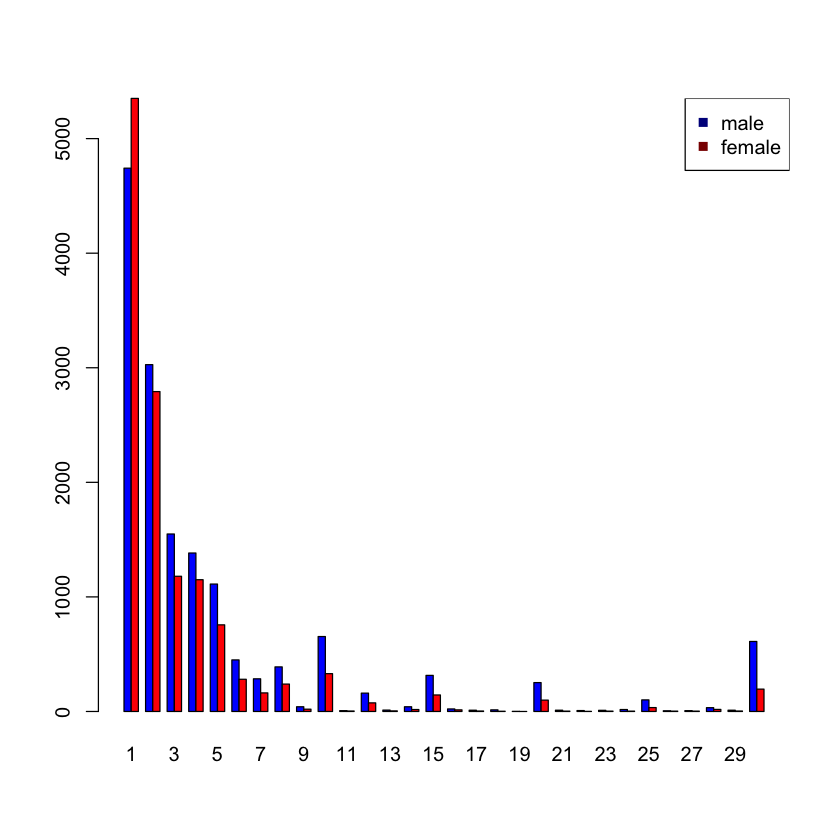

In [68]:
barplot(table(poisson.data$sex, poisson.data$drnk3ge5), beside=TRUE, col=c("blue","red"))
legend("topright", legend=c("male","female"),
       col=c("darkblue","darkred"), pch=15)

<div class="alert alert-block alert-success">
<a id="Poisson"></a>
    
# Poisson Regression model
    
Build a Poisson regression model using **at most 4 explanatory variables (where at least one is a categorical variable)**. You can try alternate models and compare models using AIC. Remember to include interactions when appropriate. Show the results below for your final model. Include any other models you tried in **Appendix B**.
    
</div>    

### Fit your final model (1 mark for this model being appropriate for the data)


Based on AIC comparision, the model with MNTHLTH, EDUCA, SEX, MARITAL has highest prediction fit.   

Mental health is also chosen over physical health, very poor health, and sleep time because this variable has better consistency in predicting excessive drinking (constant positive lowess line).

Education level, marital status, and sex/gender are also chosen for the same reasonings.

An interaction term between sex/gender and marital status is also included, since being married or not can greatly affect each gender's behaviour.

And since there is an overdispersion, a quasipoisson distribution is applied in the model.

In [69]:


p.final <- glm(drnk3ge5 ~  menthlth + educa + sex*marital, data = poisson.data, family = 'quasipoisson'(link='log'))

summary(p.final)


Call:
glm(formula = drnk3ge5 ~ menthlth + educa + sex * marital, family = quasipoisson(link = "log"), 
    data = poisson.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.9917  -1.6273  -1.0231   0.1788   9.8178  

Coefficients:
                                                                    Estimate
(Intercept)                                                        1.5125693
menthlth                                                           0.0169897
educaGrades 9 though 11 (Some high school)                         0.0714380
educaGrade 12 or GED (High school graduate)                        0.0161528
educaCollege 1 year to 3 years (Some college or technical school) -0.0873861
educaCollege 4 years or more (College graduate)                   -0.2466995
sexFemale                                                         -0.3912318
maritalDivorced/Separated                                          0.2786023
maritalWidowed                                   

log(drnk3ge5) = 1.5125693    
    + 0.0169897 **menthlth**     
    + 0.0714380 **educaGrades 9 though 11**   
    + 0.0161528 **educaGrade 12 or GED**         
    + (-0.0873861) **educaCollege 1 year to 3 years**      
    + (-0.2466995) **educaCollege 4 years or more**      
    + (-0.3912318) **sexFemale**      
    + 0.2786023 **maritalDivorced/Separated**      
    + 0.3399689 **maritalWidowed**     
    + 0.0533331 **maritalNever married**     
    + 0.0178298 **maritalA member of an unmarried couple**    
    + (-0.1239567) **sexFemale:maritalDivorced/Separated**    
    + (-0.0902542) **sexFemale:maritalWidowed**   
    + 0.0440902 **sexFemale:maritalNever married**   
    + 0.1049376 **sexFemale:maritalA member of an unmarried couple**

From the above function, we can convert the coefficients into normal units. For interpretation, we can see that a person drink excessively as follows: 
+ ***Intercept***: **4.54 days** if they have **0 days of poor mental health**, **elementary education level**, is a **male**, and is **married** **(reference level)**  
     
+ ***menthlth***: For every day that this person has poor mental health, they will drink **1.7% more** than the reference level.  
  
+ ***educaGrades 9 though 11***: If this person earns **some high school education**, they will drink **7.4% more** than the reference level.  
  
+ ***educaGrade 12 or GED***: If this person **graduated from high school** education ,they will drink **1.6% more** than the reference level.  
  
+ ***educaCollege 1 year to 3 years***: If this person earns **some college-level** education, they will drink **8.4% less** than the reference level.  
  
+ ***educaCollege 4 years or more***: If this person **graduated from college** education, they will drink **21.9% less** than the reference level.  
  
+ ***sexFemale***: If this person is a **female**, she will drink **32.4% less** than the reference level.  
  
+ ***maritalDivorced/Separated***: If this person is **divorced/separted** from their partner, they will drink **32.1% more** than the reference level.  
  
+ ***maritalWidowed***: If this person is **widowed** from their partner, they will drink **40.5% more** than the reference level. 
  
+ ***maritalNever married***: If this person is **never maried**, they will drink **5.5% more** than the reference level.  
  
+ ***maritalA member of an unmarried couple***: If this person is **in a relationship but not married**, they will drink **1.8% more** than the reference level.
  
+ ***sexFemale:maritalDivorced/Separated***: The effect of being **divorced/separted** will help a **female** drinks even **11.7% less** than the reference level.  
  
+ ***sexFemale:maritalWidowed***: The effect of being **widowed** will help a **female** drinks even **8.6% less** than the reference level.  
  
+ ***sexFemale:maritalNever married***: On the other hand, being **never married** will cause a **female** to drinks even **4.5% more** than the reference level.  
  
+ ***sexFemale:maritalA member of an unmarried couple***: Simiarly, being **in an relationship but not married** will cause a **female** to drinks **11.1% more** than the reference level.
  




The value of residual deviance/df means that this model is overdispersed. Thus, a quasipoisson distribution is applied in the final model to account for estimation of dispersion parameter

In [70]:
p.final$deviance/p.final$df.residual

[1] 4.67262

### Plots to visualize the model fit.

#### Gender & Marital fit

In [71]:
#Generate predictions for each level

gender.marital.fit <- poisson.data[,c('menthlth', 'educa')]
gender.marital.fit <- rbind(gender.marital.fit,gender.marital.fit,gender.marital.fit,gender.marital.fit,gender.marital.fit,gender.marital.fit,gender.marital.fit,gender.marital.fit,gender.marital.fit,gender.marital.fit)

marital <- c(rep('Married',nrow(poisson.data)),
             rep('Never married',nrow(poisson.data)),
             rep('Divorced/Separated',nrow(poisson.data)),
             rep('Widowed',nrow(poisson.data)),
             rep('A member of an unmarried couple',nrow(poisson.data)),
             rep('Married',nrow(poisson.data)),
             rep('Never married',nrow(poisson.data)),
             rep('Divorced/Separated',nrow(poisson.data)),
             rep('Widowed',nrow(poisson.data)),
             rep('A member of an unmarried couple',nrow(poisson.data)))

sex <- c(rep('Male',nrow(poisson.data)),
         rep('Female',nrow(poisson.data)),
         rep('Male',nrow(poisson.data)),
         rep('Female',nrow(poisson.data)),
         rep('Male',nrow(poisson.data)),
         rep('Female',nrow(poisson.data)),
         rep('Male',nrow(poisson.data)),
         rep('Female',nrow(poisson.data)),
         rep('Male',nrow(poisson.data)),
         rep('Female',nrow(poisson.data))
           )

gender.marital.fit <- cbind(gender.marital.fit,marital,sex)
gender.marital.fit$marital <- as.factor(gender.marital.fit$marital)
gender.marital.fit$sex <- as.factor(gender.marital.fit$sex)


gender.marital.predict <- predict(p.final, newdata = gender.marital.fit, type = 'response')
gender.marital.fit <- cbind(gender.marital.fit, gender.marital.predict)

marital.married.male <- subset(gender.marital.fit, gender.marital.fit$marital == 'Married' &  gender.marital.fit$sex == 'Male')
marital.never.male <- subset(gender.marital.fit, gender.marital.fit$marital == 'Never married'&  gender.marital.fit$sex == 'Male')
marital.divorced.married.male <- subset(gender.marital.fit, gender.marital.fit$marital == 'Divorced/Separated'&  gender.marital.fit$sex == 'Male')
marital.widowed.male <- subset(gender.marital.fit, gender.marital.fit$marital == 'Widowed'&  gender.marital.fit$sex == 'Male')
marital.dating.male <- subset(gender.marital.fit, gender.marital.fit$marital == 'A member of an unmarried couple'&  gender.marital.fit$sex == 'Male')

marital.married.female <- subset(gender.marital.fit, gender.marital.fit$marital == 'Married' &  gender.marital.fit$sex == 'Female')
marital.never.female <- subset(gender.marital.fit, gender.marital.fit$marital == 'Never married'&  gender.marital.fit$sex == 'Female')
marital.divorced.married.female <- subset(gender.marital.fit, gender.marital.fit$marital == 'Divorced/Separated'&  gender.marital.fit$sex == 'Female')
marital.widowed.female <- subset(gender.marital.fit, gender.marital.fit$marital == 'Widowed'&  gender.marital.fit$sex == 'Female')
marital.dating.female <- subset(gender.marital.fit, gender.marital.fit$marital == 'A member of an unmarried couple'&  gender.marital.fit$sex == 'Female')

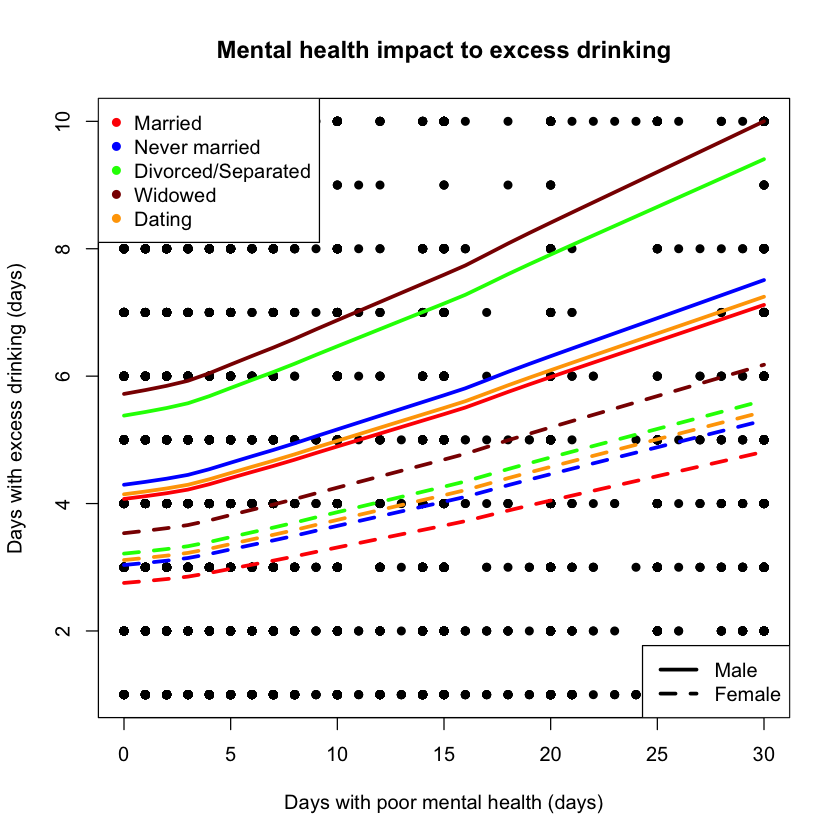

In [72]:
#Visualize model fit

plot(x = poisson.data$menthlth, 
     y = poisson.data$drnk3ge5, 
     ylim = c(1,10), 
     pch=16, 
     xlab = 'Days with poor mental health (days)', 
     ylab = 'Days with excess drinking (days)',
     main = 'Mental health impact to excess drinking'
    )


lines(lowess(x = marital.married.male$menthlth, 
             y = marital.married.male$gender.marital.predict),lwd=3, col = 'red')

lines(lowess(x = marital.never.male$menthlth, 
             y = marital.never.male$gender.marital.predict),lwd=3, col = 'blue')

lines(lowess(x = marital.divorced.married.male$menthlth, 
             y = marital.divorced.married.male$gender.marital.predict),lwd=3, col = 'green')

lines(lowess(x = marital.widowed.male$menthlth, 
             y = marital.widowed.male$gender.marital.predict),lwd=3, col = 'darkred')

lines(lowess(x = marital.dating.male$menthlth, 
             y = marital.dating.male$gender.marital.predict),lwd=3, col = 'orange')



lines(lowess(x = marital.married.female$menthlth, 
             y = marital.married.female$gender.marital.predict),lwd=3, lty = 2, col = 'red')

lines(lowess(x = marital.never.female$menthlth, 
             y = marital.never.female$gender.marital.predict),lwd=3,lty = 2, col = 'blue')

lines(lowess(x = marital.divorced.married.female$menthlth, 
             y = marital.divorced.married.female$gender.marital.predict),lwd=3,lty = 2, col = 'green')

lines(lowess(x = marital.widowed.female$menthlth, 
             y = marital.widowed.female$gender.marital.predict),lwd=3,lty = 2,col = 'darkred')

lines(lowess(x = marital.dating.female$menthlth, 
             y = marital.dating.female$gender.marital.predict),lwd=3, lty = 2,col = 'orange')



legend("topleft", legend=c("Married", "Never married", "Divorced/Separated","Widowed","Dating"),
       col=c("red","blue", "green","darkred","orange"), pch=16,  bg="white")

legend("bottomright", legend=c("Male","Female"),
       lty=c(1,2), lwd = 3, bg="white")

gender.marital.plot <- recordPlot()

#### Marital fit

In [73]:
#Generate predictions for each level

marital.fit <- poisson.data[,c('menthlth', 'educa','sex')]
marital.fit <- rbind(marital.fit, marital.fit, marital.fit, marital.fit,marital.fit)
marital <- c(rep('Married',nrow(poisson.data)),
             rep('Never married',nrow(poisson.data)),
             rep('Divorced/Separated',nrow(poisson.data)),
             rep('Widowed',nrow(poisson.data)),
             rep('A member of an unmarried couple',nrow(poisson.data)))

marital.fit <- cbind(marital.fit,marital)
marital.fit$marital <- as.factor(marital.fit$marital)


marital.predict <- predict(p.final, newdata = marital.fit, type = 'response')
marital.fit <- cbind(marital.fit, marital.predict)

marital.married <- subset(marital.fit, marital.fit$marital == 'Married')
marital.never <- subset(marital.fit, marital.fit$marital == 'Never married')
marital.divorced.married <- subset(marital.fit, marital.fit$marital == 'Divorced/Separated')
marital.widowed <- subset(marital.fit, marital.fit$marital == 'Widowed')
marital.dating <- subset(marital.fit, marital.fit$marital == 'A member of an unmarried couple')

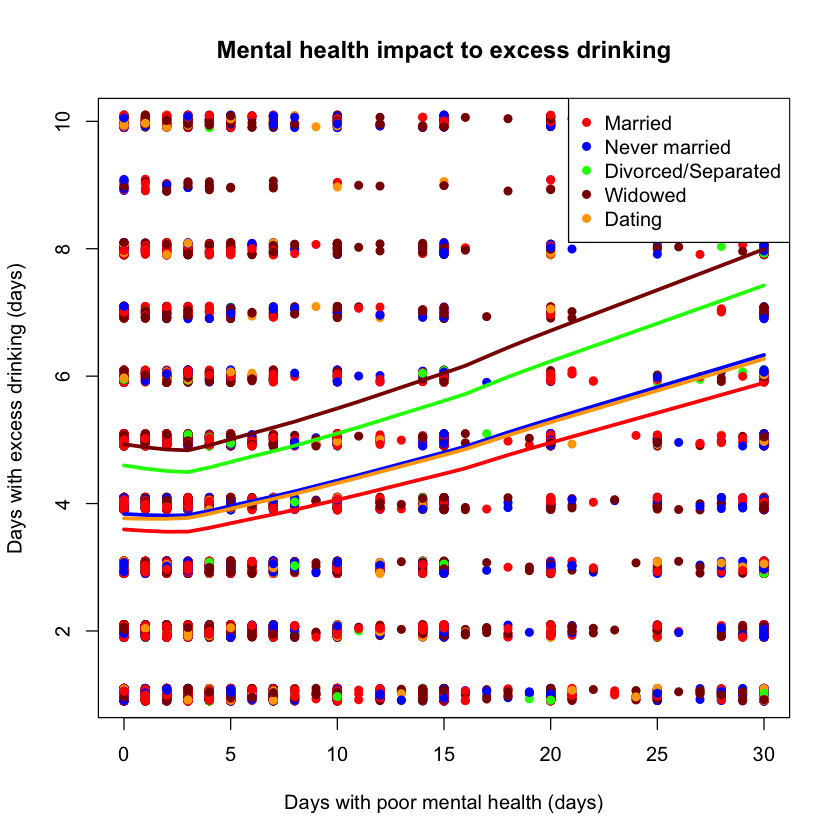

In [74]:
#Visualize model fit

plot(x = poisson.data$menthlth, 
     y = jitter(poisson.data$drnk3ge5, f=0.5), 
     ylim = c(1,10), 
     pch=16, 
     xlab = 'Days with poor mental health (days)', 
     ylab = 'Days with excess drinking (days)',
     main = 'Mental health impact to excess drinking', 
     col = c("red","blue", "green","darkred","orange")[poisson.data$marital]
    )


lines(lowess(x = marital.married$menthlth, 
             y = marital.married$marital.predict),lwd=3, col = 'red')

lines(lowess(x = marital.never$menthlth, 
             y = marital.never$marital.predict),lwd=3, col = 'blue')

lines(lowess(x = marital.divorced.married$menthlth, 
             y = marital.divorced.married$marital.predict),lwd=3, col = 'green')

lines(lowess(x = marital.widowed$menthlth, 
             y = marital.widowed$marital.predict),lwd=3, col = 'darkred')

lines(lowess(x = marital.dating$menthlth, 
             y = marital.dating$marital.predict),lwd=3, col = 'orange')

legend("topright", legend=c("Married", "Never married", "Divorced/Separated","Widowed","Dating"),
       col=c("red","blue", "green","darkred","orange"), pch=16,  bg="white")

marital.plot <- recordPlot()

#### Gender fit

In [75]:
#Generate predictions for each level

gender.fit <- poisson.data[,c('menthlth', 'educa','marital')]
gender.fit <- rbind(gender.fit, gender.fit)
sex <- c(rep('Male',nrow(poisson.data)),
             rep('Female',nrow(poisson.data))
           )

gender.fit <- cbind(gender.fit,sex)
gender.fit$sex <- as.factor(gender.fit$sex)


gender.predict <- predict(p.final, newdata = gender.fit, type = 'response')
gender.fit <- cbind(gender.fit, gender.predict)

gender.male <- subset(gender.fit, gender.fit$sex == 'Male')
gender.female <- subset(gender.fit, gender.fit$sex == 'Female')


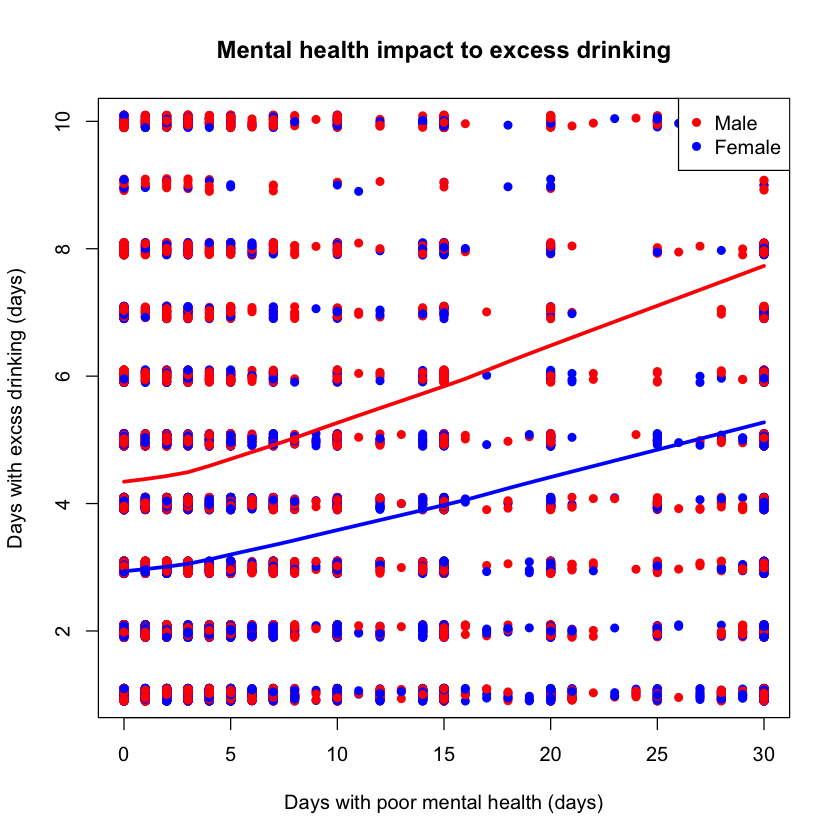

In [76]:
#Visualize model fit

plot(x = poisson.data$menthlth, 
     y = jitter(poisson.data$drnk3ge5, f=0.5), 
     ylim = c(1,10), 
     pch=16, 
     xlab = 'Days with poor mental health (days)', 
     ylab = 'Days with excss drinking (days)',
     main = 'Mental health impact to excess drinking', 
     col = c("red","blue")[poisson.data$sex]
    )


lines(lowess(x = gender.male$menthlth, 
             y = gender.male$gender.predict),lty=1, lwd=3, col = 'red')

lines(lowess(x = gender.female$menthlth, 
             y = gender.female$gender.predict),lty=1, lwd=3, col = 'blue')


legend("topright", legend=c("Male", "Female"),
       col=c("red","blue"), pch=16, bg="white")

sex.plot <- recordPlot()

#### Education fit

In [77]:
#Generate predictions for each level

edu.fit <- poisson.data[,c('menthlth', 'sex','marital')]
edu.fit <- rbind(edu.fit, edu.fit,edu.fit, edu.fit, edu.fit)
educa <- c(rep('Children',nrow(poisson.data)),
           rep('Grades 9 though 11 (Some high school)',nrow(poisson.data)),
           rep('Grade 12 or GED (High school graduate)',nrow(poisson.data)),
           rep('College 1 year to 3 years (Some college or technical school)',nrow(poisson.data)),
           rep('College 4 years or more (College graduate)',nrow(poisson.data))
           )

edu.fit <- cbind(edu.fit,educa)
edu.fit$educa <- as.factor(edu.fit$educa)


edu.predict <- predict(p.final, newdata = edu.fit, type = 'response')
edu.fit <- cbind(edu.fit, edu.predict)

edu.child <- subset(edu.fit, edu.fit$educa == 'Children')
edu.high <- subset(edu.fit, edu.fit$educa == 'Grades 9 though 11 (Some high school)')
edu.highgrad <- subset(edu.fit, edu.fit$educa == 'Grade 12 or GED (High school graduate)')
edu.college <- subset(edu.fit, edu.fit$educa == 'College 1 year to 3 years (Some college or technical school)')
edu.collegegrad <- subset(edu.fit, edu.fit$educa == 'College 4 years or more (College graduate)')


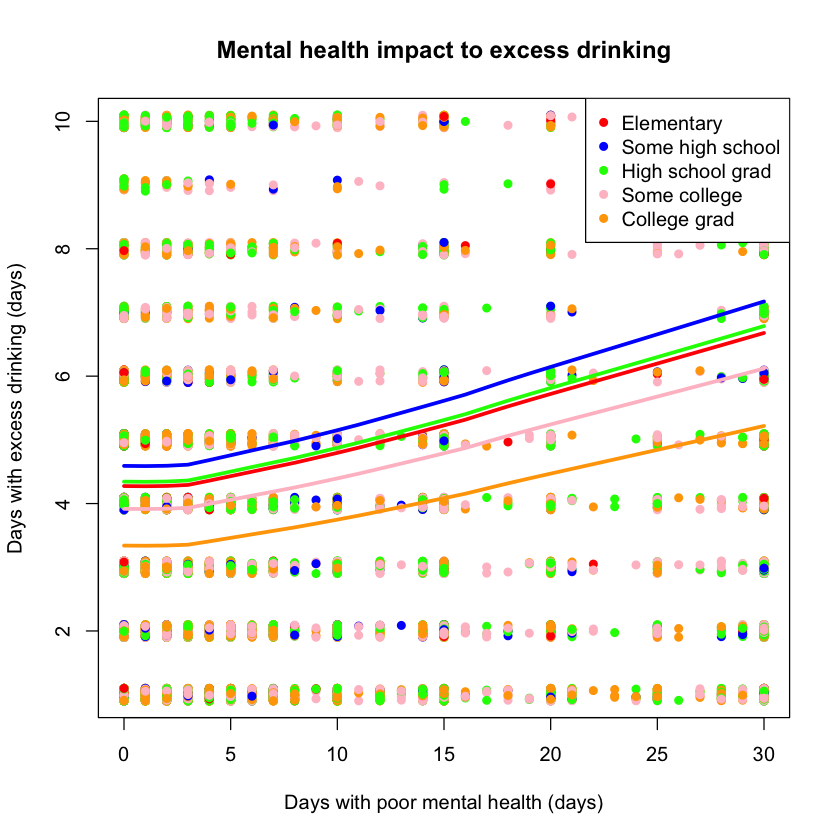

In [78]:
#Visualize model fit

plot(x = poisson.data$menthlth, 
     y = jitter(poisson.data$drnk3ge5, f=0.5), 
     ylim = c(1,10), 
     pch=16, 
     xlab = 'Days with poor mental health (days)', 
     ylab = 'Days with excess drinking (days)',
     main = 'Mental health impact to excess drinking', 
     col = c("red","blue","green","pink","orange")[poisson.data$educa]
    )


lines(lowess(x = edu.child$menthlth, 
             y = edu.child$edu.predict),lwd=3, col = 'red')

lines(lowess(x = edu.high$menthlth, 
             y = edu.high$edu.predict),lwd=3, col = 'blue')

lines(lowess(x = edu.highgrad$menthlth, 
             y = edu.highgrad$edu.predict),lwd=3, col = 'green')

lines(lowess(x = edu.college$menthlth, 
             y = edu.college$edu.predict),lwd=3, col = 'pink')

lines(lowess(x = edu.collegegrad$menthlth, 
             y = edu.collegegrad$edu.predict),lwd=3, col = 'orange')


legend("topright", legend=c("Elementary", "Some high school","High school grad", "Some college", "College grad"),
       col=c("red","blue","green","pink","orange"), pch=16, bg="white")

edu.plot <- recordPlot()

### Final model result discussion

#### Poor mental health

In general, all fitted values has positive trends, which follows the interpreted MENTHLTH's positive coefficient. This also confirms our expectation that the more days with poor menta health there are, the more excessive drinking there is.

#### Gender & Marital status

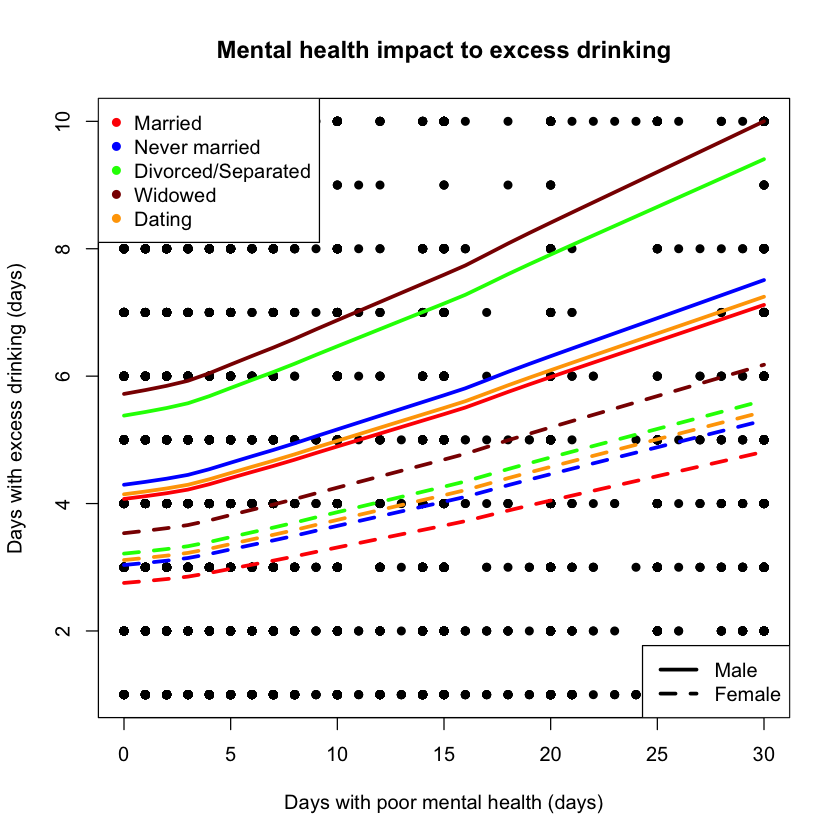

In [79]:
replayPlot(gender.marital.plot)

#### Education level
Following the interpreted function, having only a high school education leads to more excessive drinking, probably explained by the lack of knowledge. Accordingly, having at least some college education will reduce excessive drinking, but not as low as having graduated from college.

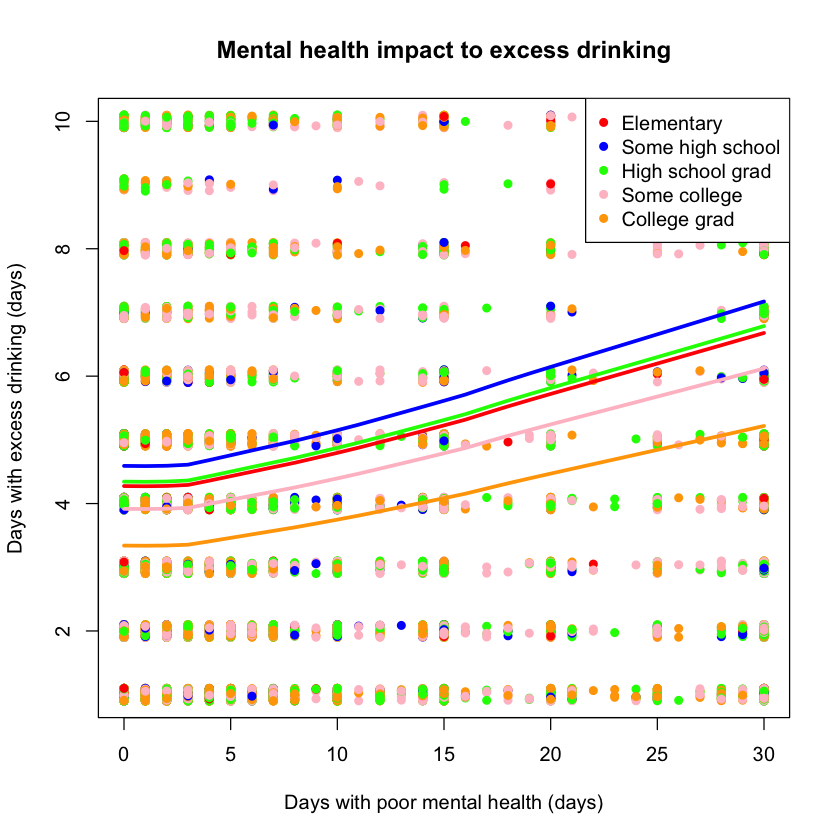

In [80]:
replayPlot(edu.plot)

---
## Concerns regarding collinearity


In reality, marital status has a significant effect on the behaviour of an individual based on their gender. This can explain the why the interaction between marital status and sex/gender has a strong VIF value. Even without the interacton term, marital status alone indicates modearate multicolliarity with gender/sex.    

We can also expect that a person's mental health indication can varies depend on their education level, gender, or marital status. Generally, more educated people are more mentally healthy, or different genders have different mental capacity, or marital status can affect one mental's state. This is confirmed as each categorical variable's chi-squared test with MENTHLTH shows a small p-value, thus suggesting that  there is a significant relationship between the continuous variable and the categorical variables.

As the result, this model might have inflated its goodness of fit and has the lowest AIC compared to other models in Appendix B.

In [81]:
vif(p.final)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



GVIF      Df GVIF^(1/(2*Df))
menthlth     1.052209 1  1.025772       
educa        1.068351 4  1.008299       
sex          2.625110 1  1.620219       
marital      7.883486 4  1.294463       
sex:marital 15.485087 4  1.408443

In [82]:
#Chi-square test between MENTHLTH & EDUCA

chisq.test(table(poisson.data$menthlth,poisson.data$educa))


Warning message in chisq.test(table(poisson.data$menthlth, poisson.data$educa)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(poisson.data$menthlth, poisson.data$educa)
X-squared = 1188.9, df = 120, p-value < 2.2e-16


In [83]:
#Chi-square test between MENTHLTH & SEX

chisq.test(table(poisson.data$menthlth,poisson.data$sex))


Warning message in chisq.test(table(poisson.data$menthlth, poisson.data$sex)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(poisson.data$menthlth, poisson.data$sex)
X-squared = 501.75, df = 30, p-value < 2.2e-16


In [84]:
#Chi-square test between MENTHLTH & MARITAL

chisq.test(table(poisson.data$menthlth,poisson.data$marital))


Warning message in chisq.test(table(poisson.data$menthlth, poisson.data$marital)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(poisson.data$menthlth, poisson.data$marital)
X-squared = 885.37, df = 120, p-value < 2.2e-16


<div class="alert alert-block alert-success">
<a id="Discussion"></a>

# Discussion 
<div>


**Logistic regression**

For Logistic regression, our model has achieved the lowest AIC value among all the alternative models and has given us some really valuable insight about the relationship between alcohol consumption and its corresponding factors.
The strengths of our logistic regression model are that first we have incorporate an interaction term which can break down the effect of different variables more for us to get a better understanding what is the alcohol consumption for different categorical levels. Second, among all the alternative models, our model achieved the lowest AIC value the rather high AUC value, which means that our model is performing well.

One of the limitations of our logistic model is that we only include one quantitative variable, since ohters have non-linear relationship with the response variable and may cause severe multicollinearity. Second, our AUC value is not large enough which means that our model has difficulty identifying the true positives and may underestimate the alcohol consumption. Also, there are also large amount of categorical levels that are insignificant in the model which make our model less simple.

To address the limitation of out final logistic regression model, there are several recommendations. First, we could find more relevant quantitative varaibles to include in our model and enlarge the sample size. Second, we could merge some of the categorical levels which are insigificant in our model to make it less complicated and more useful.

**Poisson regression**

Similary, for Poisson regression, we achieved highest goodness of fit for our mode. The elements of this model can tell us how mental health, gender, marital status, and education level can affect their excessive drinking habit. 

A strength for our model is that we only use 1 simple continuous variable - mental health - which has consistent attribute that allows us to predict the drinking pattern easily. However, this can also be a weakness since it might not be sufficient in explaining many observations.

Our choice of categorical variables and interaction terms can also have both positive and negative impact. They can explain realistic behaviours, at the risk of very strong multicollinearity. The interaction between two categorical variables also make it a challenge to properly interpret the model performance.

A possible recommendation is to apply another model with the interaction between MENTHLTH and any of the categorical variables. By doing so, we will be able to see differences in slope for MENTHLTH at different categorical variables.  

<div class="alert alert-block alert-danger">
<a id="AppendixA"></a>

# Appendix A:
# Building the Logistic Regression Models

In [85]:
full_model <- glm(alcday5_new ~ physhlth + menthlth + poorhlth + sleptim1 + marital + educa + income2 + sex, data = mydata, family = "binomial"(link="logit"))
summary(full_model)


Call:
glm(formula = alcday5_new ~ physhlth + menthlth + poorhlth + 
    sleptim1 + marital + educa + income2 + sex, family = binomial(link = "logit"), 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1512  -1.0565   0.5995   1.0221   2.3047  

Coefficients:
                                                                    Estimate
(Intercept)                                                       -1.0221420
physhlth                                                          -0.0244404
menthlth                                                           0.0047238
poorhlth                                                          -0.0111326
sleptim1                                                          -0.0034342
maritalDivorced                                                    0.2919472
maritalWidowed                                                    -0.1106133
maritalSeparated                                                   0.3789361
marita

In [86]:
model1 <- glm(alcday5_new ~ physhlth + menthlth + poorhlth + sex, data = mydata, family = "binomial"(link="logit"))
summary(model1)


Call:
glm(formula = alcday5_new ~ physhlth + menthlth + poorhlth + 
    sex, family = binomial(link = "logit"), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4988  -1.1947   0.8871   1.1006   1.7861  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.7309801  0.0089223  81.927   <2e-16 ***
physhlth    -0.0354421  0.0005492 -64.529   <2e-16 ***
menthlth    -0.0012717  0.0005201  -2.445   0.0145 *  
poorhlth    -0.0157480  0.0006671 -23.608   <2e-16 ***
sexFemale   -0.5255496  0.0096906 -54.233   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 272603  on 196672  degrees of freedom
Residual deviance: 259528  on 196668  degrees of freedom
AIC: 259538

Number of Fisher Scoring iterations: 4


In [87]:
model2 <- glm(alcday5_new ~ physhlth + menthlth + poorhlth + marital, data = mydata, family = "binomial"(link="logit"))
summary(model2)


Call:
glm(formula = alcday5_new ~ physhlth + menthlth + poorhlth + 
    marital, family = binomial(link = "logit"), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5722  -1.2084   0.8446   1.0434   1.9517  

Coefficients:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                             0.4656200  0.0076901  60.548  < 2e-16
physhlth                               -0.0320949  0.0005517 -58.169  < 2e-16
menthlth                               -0.0032370  0.0005219  -6.202 5.58e-10
poorhlth                               -0.0150414  0.0006682 -22.511  < 2e-16
maritalDivorced                        -0.1355171  0.0133177 -10.176  < 2e-16
maritalWidowed                         -0.6977250  0.0157601 -44.272  < 2e-16
maritalSeparated                       -0.1945738  0.0284896  -6.830 8.51e-12
maritalNever married                    0.0726313  0.0131648   5.517 3.45e-08
maritalA member of an unmarried coupl

In [88]:
model3 <- glm(alcday5_new ~ physhlth + menthlth + poorhlth + educa, data = mydata, family = "binomial"(link="logit"))
summary(model3)


Call:
glm(formula = alcday5_new ~ physhlth + menthlth + poorhlth + 
    educa, family = binomial(link = "logit"), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5390  -1.1389   0.8598   1.0572   2.0791  

Coefficients:
                                                                    Estimate
(Intercept)                                                       -0.7058131
physhlth                                                          -0.0296092
menthlth                                                           0.0009604
poorhlth                                                          -0.0140406
educaGrades 1 through 8 (Elementary)                              -0.0235977
educaGrades 9 though 11 (Some high school)                         0.3261423
educaGrade 12 or GED (High school graduate)                        0.7009578
educaCollege 1 year to 3 years (Some college or technical school)  1.0418665
educaCollege 4 years or more (College graduate) 

In [89]:
model4 <- glm(alcday5_new ~ physhlth + menthlth + poorhlth + income2, data = mydata, family = "binomial"(link="logit"))
summary(model4)


Call:
glm(formula = alcday5_new ~ physhlth + menthlth + poorhlth + 
    income2, family = binomial(link = "logit"), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6801  -1.0777   0.7689   1.0560   1.8649  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -0.3667507  0.0193354 -18.968  < 2e-16 ***
physhlth                 -0.0273044  0.0005625 -48.543  < 2e-16 ***
menthlth                  0.0042929  0.0005332   8.052 8.16e-16 ***
poorhlth                 -0.0101255  0.0006800 -14.891  < 2e-16 ***
income2Less than $15,000 -0.0560483  0.0252110  -2.223   0.0262 *  
income2Less than $20,000  0.0929724  0.0237830   3.909 9.26e-05 ***
income2Less than $25,000  0.2642621  0.0229730  11.503  < 2e-16 ***
income2Less than $35,000  0.4330636  0.0225696  19.188  < 2e-16 ***
income2Less than $50,000  0.6764470  0.0218605  30.944  < 2e-16 ***
income2Less than $75,000  0.9073160  0.0218752  41.477  < 2

In [90]:
model5 <- glm(alcday5_new ~ physhlth + marital + sex + income2 + educa, data = mydata, family = "binomial"(link="logit"))
summary(model5)


Call:
glm(formula = alcday5_new ~ physhlth + marital + sex + income2 + 
    educa, family = binomial(link = "logit"), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0990  -1.0588   0.6008   1.0196   2.2326  

Coefficients:
                                                                    Estimate
(Intercept)                                                       -1.0375149
physhlth                                                          -0.0291254
maritalDivorced                                                    0.2930216
maritalWidowed                                                    -0.1091763
maritalSeparated                                                   0.3854576
maritalNever married                                               0.4470587
maritalA member of an unmarried couple                             0.7582686
sexFemale                                                         -0.4720618
income2Less than $15,000                    

In [91]:
model6 <- glm(alcday5_new ~ physhlth + marital + sex * income2 , data = mydata, family = "binomial"(link="logit"))
summary(model6)


Call:
glm(formula = alcday5_new ~ physhlth + marital + sex * income2, 
    family = binomial(link = "logit"), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0212  -1.0615   0.6138   1.0382   2.0359  

Coefficients:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                            -0.2644799  0.0325206  -8.133 4.20e-16
physhlth                               -0.0304482  0.0004828 -63.061  < 2e-16
maritalDivorced                         0.3509215  0.0145955  24.043  < 2e-16
maritalWidowed                         -0.0963424  0.0171126  -5.630 1.80e-08
maritalSeparated                        0.3896433  0.0300544  12.965  < 2e-16
maritalNever married                    0.5078868  0.0145262  34.964  < 2e-16
maritalA member of an unmarried couple  0.7803468  0.0287197  27.171  < 2e-16
sexFemale                              -0.6636006  0.0379743 -17.475  < 2e-16
income2Less than $15,000               -0.0

In [92]:
model7 <- glm(alcday5_new ~ physhlth + marital + educa * income2 , data = mydata, family = "binomial"(link="logit"))
summary(model7)


Call:
glm(formula = alcday5_new ~ physhlth + marital + educa * income2, 
    family = binomial(link = "logit"), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0351  -1.0707   0.6227   1.0437   2.4693  

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                -1.9933766
physhlth                                                                                   -0.0278948
maritalDivorced                                                                             0.2759060
maritalWidowed                                                                             -0.1917597
maritalSeparated                                                                            0.3630585
maritalNever married                                                                        0.4897841
maritalA member of an unmarri

In [93]:
model8 <- glm(alcday5_new ~ physhlth + marital + sex * educa , data = mydata, family = "binomial"(link="logit"))
summary(model8)


Call:
glm(formula = alcday5_new ~ physhlth + marital + sex * educa, 
    family = binomial(link = "logit"), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8461  -1.0826   0.7594   1.0373   2.3554  

Coefficients:
                                                                              Estimate
(Intercept)                                                                 -0.1664424
physhlth                                                                    -0.0355006
maritalDivorced                                                             -0.0702639
maritalWidowed                                                              -0.4386636
maritalSeparated                                                            -0.0043393
maritalNever married                                                         0.0807893
maritalA member of an unmarried couple                                       0.4880171
sexFemale                                          

In [94]:
model9 <- glm(alcday5_new ~ physhlth + marital * sex + income2, data = mydata, family = "binomial"(link="logit"))
summary(model9)


Call:
glm(formula = alcday5_new ~ physhlth + marital * sex + income2, 
    family = binomial(link = "logit"), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0505  -1.0649   0.6097   1.0435   2.0188  

Coefficients:
                                                  Estimate Std. Error z value
(Intercept)                                      -0.402474   0.023006 -17.495
physhlth                                         -0.030475   0.000483 -63.100
maritalDivorced                                   0.368458   0.023508  15.674
maritalWidowed                                   -0.010120   0.033400  -0.303
maritalSeparated                                  0.388066   0.051022   7.606
maritalNever married                              0.454236   0.021193  21.433
maritalA member of an unmarried couple            0.776795   0.046222  16.806
sexFemale                                        -0.445379   0.013968 -31.885
income2Less than $15,000                   

In [95]:
model10 <- glm(alcday5_new ~ physhlth + marital * income2 + sex, data = mydata, family = "binomial"(link="logit"))
summary(model10)


Call:
glm(formula = alcday5_new ~ physhlth + marital * income2 + sex, 
    family = binomial(link = "logit"), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0217  -1.0709   0.6548   1.0313   2.0959  

Coefficients:
                                                                 Estimate
(Intercept)                                                     -0.359662
physhlth                                                        -0.030152
maritalDivorced                                                  0.275525
maritalWidowed                                                  -0.370388
maritalSeparated                                                 0.233841
maritalNever married                                             0.550655
maritalA member of an unmarried couple                           0.687863
income2Less than $15,000                                        -0.090865
income2Less than $20,000                                         0.069009
incom

### Compare the AIC values for candidate models

In [96]:
AIC(model1)

[1] 259538.3

In [97]:
AIC(model2)

[1] 259844.4

In [98]:
AIC(model3)

[1] 255591.1

In [99]:
AIC(model4)

[1] 252094

In [100]:
AIC(model5)

[1] 245770.1

In [101]:
AIC(model6)

[1] 247501.9

In [102]:
AIC(model7)

[1] 247886.1

In [103]:
AIC(model8)

[1] 251296.2

In [104]:
AIC(model9)

[1] 247587.8

In [105]:
AIC(model10)

[1] 247221.6

<div class="alert alert-block alert-danger">
<a id="AppendixB"></a>

# Appendix B:
# Building the Poisson Regression Models
</div>

In [106]:
#Model 1

p.1 <- glm(drnk3ge5 ~ physhlth + marital + educa + sex, data = poisson.data, family = 'poisson'(link='log'))
summary(p.1)

p.1.aic <- summary(p.1)$aic



Call:
glm(formula = drnk3ge5 ~ physhlth + marital + educa + sex, family = poisson(link = "log"), 
    data = poisson.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5849  -1.6609  -1.0637   0.1642   9.6596  

Coefficients:
                                                                    Estimate
(Intercept)                                                        1.5737200
physhlth                                                           0.0108549
maritalDivorced/Separated                                          0.2584000
maritalWidowed                                                     0.3039780
maritalNever married                                               0.1037221
maritalA member of an unmarried couple                             0.0913480
educaGrades 9 though 11 (Some high school)                         0.0685531
educaGrade 12 or GED (High school graduate)                        0.0062236
educaCollege 1 year to 3 years (Some college or techni

In [107]:
#Model 2

p.2 <- glm(drnk3ge5 ~  menthlth + marital + educa +  sex, data = poisson.data, family = 'poisson'(link='log'))
summary(p.2)

p.2.aic <- summary(p.2)$aic


Call:
glm(formula = drnk3ge5 ~ menthlth + marital + educa + sex, family = poisson(link = "log"), 
    data = poisson.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8960  -1.6370  -1.0115   0.1917   9.8417  

Coefficients:
                                                                    Estimate
(Intercept)                                                        1.5175798
menthlth                                                           0.0169888
maritalDivorced/Separated                                          0.2328315
maritalWidowed                                                     0.2973790
maritalNever married                                               0.0673644
maritalA member of an unmarried couple                             0.0593978
educaGrades 9 though 11 (Some high school)                         0.0719969
educaGrade 12 or GED (High school graduate)                        0.0162195
educaCollege 1 year to 3 years (Some college or techni

In [108]:
#Model 3

p.3 <- glm(drnk3ge5 ~  poorhlth  + marital + educa + sex, data = poisson.data, family = 'poisson'(link='log'))
summary(p.3)

p.3.aic <- summary(p.3)$aic


Call:
glm(formula = drnk3ge5 ~ poorhlth + marital + educa + sex, family = poisson(link = "log"), 
    data = poisson.data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-3.921  -1.674  -1.046   0.147   9.645  

Coefficients:
                                                                    Estimate
(Intercept)                                                        1.5763197
poorhlth                                                           0.0156414
maritalDivorced/Separated                                          0.2434140
maritalWidowed                                                     0.2940216
maritalNever married                                               0.0906614
maritalA member of an unmarried couple                             0.0783524
educaGrades 9 though 11 (Some high school)                         0.0668108
educaGrade 12 or GED (High school graduate)                        0.0140491
educaCollege 1 year to 3 years (Some college or technical school

In [109]:
#Model 2 w/ HLTH-SEX interaction

p.2.hlth.sex <- glm(drnk3ge5 ~  menthlth*sex + marital + educa , data = poisson.data, family = 'poisson'(link='log'))
summary(p.2.hlth.sex)

p.2.hlth.sex.aic <- summary(p.2.hlth.sex)$aic


Call:
glm(formula = drnk3ge5 ~ menthlth * sex + marital + educa, family = poisson(link = "log"), 
    data = poisson.data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-3.935  -1.628  -1.027   0.197   9.810  

Coefficients:
                                                                    Estimate
(Intercept)                                                        1.5102744
menthlth                                                           0.0176775
sexFemale                                                         -0.3882101
maritalDivorced/Separated                                          0.2329520
maritalWidowed                                                     0.2979094
maritalNever married                                               0.0673062
maritalA member of an unmarried couple                             0.0597570
educaGrades 9 though 11 (Some high school)                         0.0733215
educaGrade 12 or GED (High school graduate)                     

In [110]:
#Model 2 w/ MARI-SEX interaction

p.2.mari.sex <- glm(drnk3ge5 ~  menthlth+sex*marital + educa , data = poisson.data, family = 'poisson'(link='log'))
summary(p.2.mari.sex)

p.2.mari.sex.aic <- summary(p.2.mari.sex)$aic


Call:
glm(formula = drnk3ge5 ~ menthlth + sex * marital + educa, family = poisson(link = "log"), 
    data = poisson.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.9917  -1.6273  -1.0231   0.1788   9.8178  

Coefficients:
                                                                    Estimate
(Intercept)                                                        1.5125693
menthlth                                                           0.0169897
sexFemale                                                         -0.3912318
maritalDivorced/Separated                                          0.2786023
maritalWidowed                                                     0.3399689
maritalNever married                                               0.0533331
maritalA member of an unmarried couple                             0.0178298
educaGrades 9 though 11 (Some high school)                         0.0714380
educaGrade 12 or GED (High school graduate)           

In [111]:
#Model 2 w/ MARI-HLTH interaction

p.2.mari.hlth <- glm(drnk3ge5 ~  menthlth*marital + educa + sex , data = poisson.data, family = 'poisson'(link='log'))
summary(p.2.mari.hlth)

p.2.mari.hlth.aic <- summary(p.2.mari.hlth)$aic


Call:
glm(formula = drnk3ge5 ~ menthlth * marital + educa + sex, family = poisson(link = "log"), 
    data = poisson.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5997  -1.6411  -1.0058   0.1954   9.8787  

Coefficients:
                                                                    Estimate
(Intercept)                                                        1.5067517
menthlth                                                           0.0189261
maritalDivorced/Separated                                          0.2783190
maritalWidowed                                                     0.3901054
maritalNever married                                               0.0700766
maritalA member of an unmarried couple                             0.0451016
educaGrades 9 though 11 (Some high school)                         0.0669231
educaGrade 12 or GED (High school graduate)                        0.0108632
educaCollege 1 year to 3 years (Some college or techni

### Test interaction significance

In [112]:
#Test interaction significance

anova(p.2, p.2.hlth.sex, test = "Chi")

Resid. Df Resid. Dev Df Deviance Pr(>Chi)    
1 28163     131714.0   NA       NA           NA
2 28162     131702.9    1 11.14426 0.0008429216

In [113]:
#Test interaction significance

anova(p.2, p.2.mari.sex, test = "Chi")

Resid. Df Resid. Dev Df Deviance Pr(>Chi)    
1 28163     131714.0   NA       NA           NA
2 28159     131576.3    4 137.7001 8.769554e-29

In [114]:
#Test interaction significance

anova(p.2, p.2.mari.hlth, test = "Chi")

Resid. Df Resid. Dev Df Deviance Pr(>Chi)    
1 28163     131714.0   NA       NA           NA
2 28159     131610.4    4 103.6399 1.650778e-21

### Compare the AIC values for candidate models

In [115]:
p.models.aic <- data.frame(model = c('1','2','3', '2 w/ hlth-sex interactin','2 w/ mari-sex interactin','2 w/ hlth-mari interactin'), 
                         aic = c(p.1.aic,p.2.aic,p.3.aic,p.2.hlth.sex.aic,p.2.mari.sex.aic, p.2.mari.hlth.aic))

p.models.aic <- p.models.aic[order(p.models.aic$aic),]

p.models.aic


model                     aic     
5 2 w/ mari-sex interactin  212264.6
6 2 w/ hlth-mari interactin 212298.7
4 2 w/ hlth-sex interactin  212385.2
2 2                         212394.3
3 3                         213921.2
1 1                         214709.8